# Capstone Project : Case study 1

#### Objectif:
## Identify how do casual and annual riders  use Cyclistic bikes differently, 
## in order to help design a new marketing strategy to convert casual to annual member .

### Setting-up environment

In [1]:
library(ggmap)
library(geosphere)
library(lubridate)
library(tidyverse)
library(skimr)
library(janitor)
library(fs)

Loading required package: ggplot2
ℹ Google's Terms of Service: <https://mapsplatform.google.com>
ℹ Please cite ggmap if you use it! Use `citation("ggmap")` for details.
Attaching package: ‘lubridate’

The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  3.2.1     ✔ purrr   1.0.1
✔ tidyr   1.3.0     ✔ dplyr   1.1.2
✔ readr   1.3.1     ✔ stringr 1.5.0
✔ tibble  3.2.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate:

### Loading data

In [161]:
data_dir <- "/home/ayoub/Downloads/google_data_analysis_certification/capstone/trip_data"
data_parts <- data_dir  %>%  dir_ls()  %>% map(.f = function(path){
    read_csv(path,
            col_types = cols(
            ride_id = col_character(),
            rideable_type = col_factor(),
            started_at = col_datetime(),
            ended_at = col_datetime(),
            start_station_name = col_character(),
            start_station_id = col_character(),
            end_station_name = col_character(),
            end_station_id = col_character(),
            start_lng = col_double(),
            start_lat = col_double(),
            end_lng = col_double(),
            end_lat = col_double(),
            member_casual = col_factor()))
})

In [162]:
trip_data <- data_parts  %>% set_names(dir_ls(data_dir))  %>% bind_rows()

### Data overview

In [4]:
sample(trip_data)

end_station_name,end_station_id,start_station_id,started_at,rideable_type,ended_at,ride_id,member_casual,end_lng,start_lng,end_lat,start_lat,start_station_name
Halsted St & Roscoe St,TA1309000025,TA1307000117,2022-05-23 23:06:58,classic_bike,2022-05-23 23:40:19,EC2DE40644C6B0F4,member,-87.64895,-87.62676,41.94367,41.89147,Wabash Ave & Grand Ave
Field Blvd & South Water St,15534,13300,2022-05-11 08:53:28,classic_bike,2022-05-11 09:31:22,1C31AD03897EE385,member,-87.61752,-87.61674,41.88635,41.88096,DuSable Lake Shore Dr & Monroe St
Wood St & Milwaukee Ave,13221,TA1305000032,2022-05-26 18:36:28,classic_bike,2022-05-26 18:58:18,1542FBEC830415CF,member,-87.67255,-87.64107,41.90765,41.88224,Clinton St & Madison St
Clark St & Randolph St,TA1305000030,TA1305000032,2022-05-10 07:30:07,classic_bike,2022-05-10 07:38:49,6FF59852924528F8,member,-87.63189,-87.64107,41.88458,41.88224,Clinton St & Madison St
Morgan St & Lake St,TA1306000015,TA1305000032,2022-05-10 17:31:56,classic_bike,2022-05-10 17:36:57,483C52CAAE12E3AC,member,-87.65102,-87.64107,41.88578,41.88224,Clinton St & Madison St
Sangamon St & Washington Blvd,13409,13196,2022-05-04 14:48:55,classic_bike,2022-05-04 14:56:04,C0A3AA5A614DCE01,member,-87.65110,-87.65345,41.88316,41.89456,Carpenter St & Huron St
Wood St & Augusta Blvd,657,13290,2022-05-27 12:41:48,classic_bike,2022-05-27 12:50:41,F2AF43A242DF4555,member,-87.67220,-87.66260,41.89918,41.90068,Noble St & Milwaukee Ave
Southport Ave & Clybourn Ave,TA1309000030,TA1309000061,2022-05-29 19:19:24,docked_bike,2022-05-29 19:31:34,377BE1F5F0E399CA,casual,-87.66371,-87.64908,41.92077,41.92914,Halsted St & Wrightwood Ave
Clybourn Ave & Division St,TA1307000115,TA1305000032,2022-05-16 17:48:44,classic_bike,2022-05-16 18:05:26,B136E0C969773F59,member,-87.64055,-87.64107,41.90461,41.88224,Clinton St & Madison St
N Southport Ave & W Newport Ave,20257.0,13235,2022-05-11 07:29:29,electric_bike,2022-05-11 07:30:57,75F6A50A05E0AA18,member,-87.66000,-87.66401,41.94000,41.94807,Southport Ave & Waveland Ave


In [5]:
t(skim_without_charts(trip_data))

,1,2,3,4,5,6,7,8,9,10,11,12,13
skim_type,POSIXct,POSIXct,character,character,character,character,character,factor,factor,numeric,numeric,numeric,numeric
skim_variable,started_at,ended_at,ride_id,start_station_name,start_station_id,end_station_name,end_station_id,rideable_type,member_casual,start_lat,start_lng,end_lat,end_lng
n_missing,0,0,0,832009,832141,889661,889802,0,0,0,0,5973,5973
complete_rate,1.0000000,1.0000000,1.0000000,0.8579962,0.8579737,0.8481564,0.8481323,1.0000000,1.0000000,1.0000000,1.0000000,0.9989806,0.9989806
POSIXct.min,2022-05-01 00:00:06,2022-05-01 00:05:17,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
POSIXct.max,2023-04-30 23:59:05,2023-05-03 10:37:12,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
POSIXct.median,2022-08-28 12:44:57,2022-08-28 13:07:09,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
POSIXct.n_unique,4916326,4930169,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
character.min,NA,NA,16,3,3,3,3,NA,NA,NA,NA,NA,NA
character.max,NA,NA,16,64,36,64,36,NA,NA,NA,NA,NA,NA


In [6]:
str(trip_data)

spc_tbl_ [5,859,061 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5859061] "EC2DE40644C6B0F4" "1C31AD03897EE385" "1542FBEC830415CF" "6FF59852924528F8" ...
 $ rideable_type     : Factor w/ 3 levels "classic_bike",..: 1 1 1 1 1 1 1 2 1 3 ...
 $ started_at        : POSIXct[1:5859061], format: "2022-05-23 23:06:58" "2022-05-11 08:53:28" ...
 $ ended_at          : POSIXct[1:5859061], format: "2022-05-23 23:40:19" "2022-05-11 09:31:22" ...
 $ start_station_name: chr [1:5859061] "Wabash Ave & Grand Ave" "DuSable Lake Shore Dr & Monroe St" "Clinton St & Madison St" "Clinton St & Madison St" ...
 $ start_station_id  : chr [1:5859061] "TA1307000117" "13300" "TA1305000032" "TA1305000032" ...
 $ end_station_name  : chr [1:5859061] "Halsted St & Roscoe St" "Field Blvd & South Water St" "Wood St & Milwaukee Ave" "Clark St & Randolph St" ...
 $ end_station_id    : chr [1:5859061] "TA1309000025" "15534" "13221" "TA1305000030" ...
 $ start_lat         : num [1:5859061] 41.

#### key takeaways:
1. this data contains 13 variable with 5,859,061 observation.
2. the number of unique value for ride_id is 5,859,061 so no duplication
3. columns started_at, ended_at ,ride_id , redeable_type, member_casual, start_lat and start_lng all have a complete_rate =1 so no missing value
4. end_lat and end lng have a complete_rate too close to 1 so empty observation can be dropped
5. the rest have a complete_rate around 0.85 -> caustion needed when dealing with
6. rideable_type and member_casual are factors with 3 and 2 respective levels so valid data -> no cleaning needed

#### deep investigation based on 5th takeaway 

In [7]:
trip_data  %>% count(start_station_name)%>% arrange(n) %>% sample()
trip_data  %>% count(start_station_id)%>% arrange(n) %>% sample()
trip_data  %>% count(end_station_name)%>% arrange(n) %>% sample()
trip_data  %>% count(end_station_name)%>% arrange(n) %>% sample()

start_station_name,n
Ada St & 95th St,1
Avenue J & 102nd St,1
Avers Ave & Ogden Ave,1
Bennett Ave & 96th St,1
Bensley Ave & 103rd St,1
California Ave & Touhy Ave - SW,1
Central Park Ave & Fillmore St,1
City Rack - Albany Ave & 103rd St,1
Corliss Ave & 103rd St,1
Corliss Ave & 133rd St,1


n,start_station_id
1,1022
1,1046
1,1063
1,1071
1,372
1,477
1,618
1,633
1,700
1,701


end_station_name,n
410,1
Ada St & 95th St,1
Ashland Ave & 73rd St,1
Avenue J & 102nd St,1
Avers Ave & Ogden Ave,1
Buffalo Ave & 133rd St,1
California Ave & Touhy Ave - SW,1
Central Ave & Adams St,1
Central Park Ave & Fillmore St,1
City Rack - Albany Ave & 103rd St,1


end_station_name,n
410,1
Ada St & 95th St,1
Ashland Ave & 73rd St,1
Avenue J & 102nd St,1
Avers Ave & Ogden Ave,1
Buffalo Ave & 133rd St,1
California Ave & Touhy Ave - SW,1
Central Ave & Adams St,1
Central Park Ave & Fillmore St,1
City Rack - Albany Ave & 103rd St,1


In [8]:
trip_data  %>% count(start_station_name)%>% filter(n <5) %>% sample()
trip_data  %>% count(start_station_id)%>% filter(n <5)%>% sample()
trip_data  %>% count(end_station_name)%>% filter(n <5) %>% sample()
trip_data  %>% count(end_station_name)%>% filter(n <5) %>% sample()

n,start_station_name
3,10101 S Stony Island Ave
2,83rd St (Avalon Park) Metra
2,Ada St & 117th St
3,Ada St & 119th St
1,Ada St & 95th St
2,Al Raby School
3,Albany Ave & 103rd St
2,Ashland Ave & 73rd St
1,Avenue J & 102nd St
4,Avenue J & 112th St


n,start_station_id
2,1014
2,1015
4,1021
1,1022
3,1029
3,1032
3,1037
2,1042
4,1043
3,1045


n,end_station_name
4,10101 S Stony Island Ave
1,410
3,83rd St (Avalon Park) Metra
2,Ada St & 117th St
2,Ada St & 119th St
1,Ada St & 95th St
2,Al Raby School
4,Albany Ave & 103rd St
1,Ashland Ave & 73rd St
4,Ashland Ave & 76th St


n,end_station_name
4,10101 S Stony Island Ave
1,410
3,83rd St (Avalon Park) Metra
2,Ada St & 117th St
2,Ada St & 119th St
1,Ada St & 95th St
2,Al Raby School
4,Albany Ave & 103rd St
1,Ashland Ave & 73rd St
4,Ashland Ave & 76th St


#### key takeaways:
- A lot of values in those columns are repeated less than 5 times which dosent make any sence 
- no consistency :some id/name are string and some other are numeric type
#### Conclusion : cleaning steps
1. drop ride_id column and any column related to station 
2. start analysing data then clean it when needed(latitude/longutide column)

In [171]:
# drop unnecessary columns
trip_data <- trip_data  %>% select("rideable_type", "started_at", "ended_at", "start_lng", "start_lat", "end_lng", "end_lat", "member_casual" )

In [10]:
head(trip_data)

rideable_type,started_at,ended_at,start_lng,start_lat,end_lng,end_lat,member_casual
classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,-87.62676,41.89147,-87.64895,41.94367,member
classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,-87.61674,41.88096,-87.61752,41.88635,member
classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,-87.64107,41.88224,-87.67255,41.90765,member
classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,-87.64107,41.88224,-87.63189,41.88458,member
classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,-87.64107,41.88224,-87.65102,41.88578,member
classic_bike,2022-05-04 14:48:55,2022-05-04 14:56:04,-87.65345,41.89456,-87.65110,41.88316,member


### Analysis steps:
##### The analysis will focus on 3 main factors that may reveal differeces between casual and annual riders
1. rideable preferences
2. time trip preference and trip duration 
3. distance travelled and prefered routes

### 1.rideable type preferences

First we start by counting the number of trips for each customer type and rideable used

In [163]:
# number of trip for each customer type
trip_data %>% count(member_casual)

member_casual,n
member,3500754
casual,2358307


In [164]:
# number of trip for each rideable type
trip_data %>% count(rideable_type)

rideable_type,n
classic_bike,2642585
docked_bike,170518
electric_bike,3045958


In [166]:
# number of trips for each combination (customer type / rideable type)
trip_data  %>% 
 group_by(member_casual, rideable_type) %>% 
 count()

member_casual,rideable_type,n
member,classic_bike,1751339
member,electric_bike,1749415
casual,classic_bike,891246
casual,docked_bike,170518
casual,electric_bike,1296543


In [167]:
# calculating percentage of rideable type preferences
rideable_member <- data.frame(count(trip_data, rideable_type, member_casual))
rideable_member_1 <- rideable_member %>% 
  filter(member_casual == "casual") %>%
  mutate(percentage = n/2358307*100) 


rideable_member_2 <- rideable_member %>% 
  filter(member_casual == "member") %>% 
  mutate(percentage = n/3500754*100) 
 


rideable_member <- dplyr::union(rideable_member_1, rideable_member_2) %>% mutate(percentage = round(percentage,digits=2))
rideable_member

rideable_type,member_casual,n,percentage
classic_bike,casual,891246,37.79
docked_bike,casual,170518,7.23
electric_bike,casual,1296543,54.98
classic_bike,member,1751339,50.03
electric_bike,member,1749415,49.97


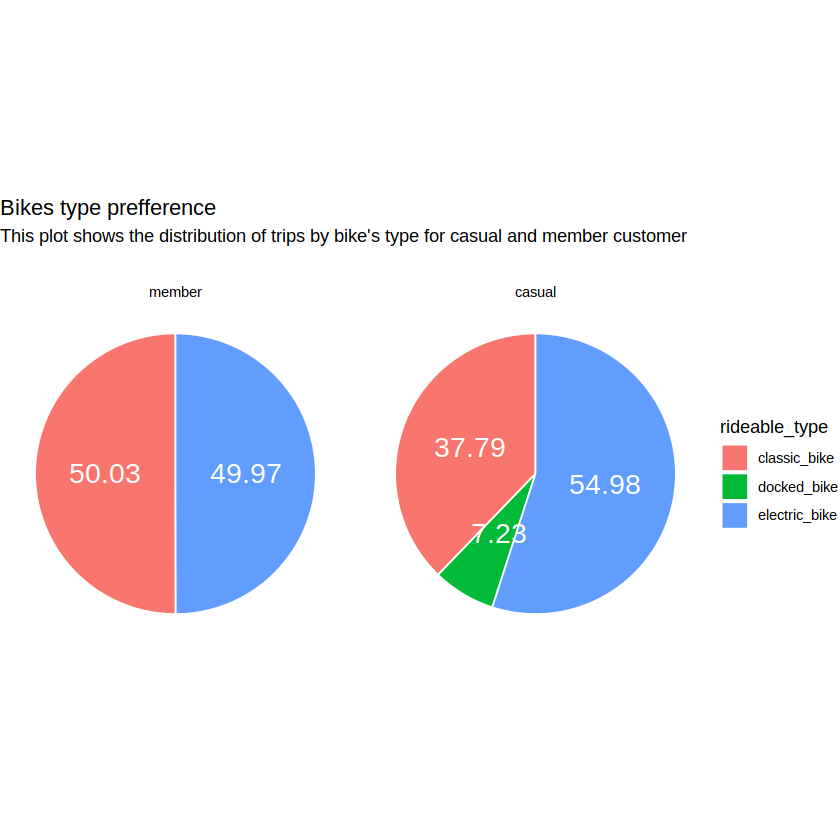

In [168]:
# create a plot of the previous table
rideable_member  %>%  ggplot(mapping=aes(x = "", y = percentage, fill = rideable_type))+
  geom_bar(stat = "identity", width = 1, color = "white")+
  coord_polar("y", start = 0)+
  facet_wrap(~member_casual)+
  theme_void()+
  geom_text(aes(label=percentage),position = position_stack(vjust = 0.5), color = "white", size=6)+
  labs(title = "Bikes type prefference", 
       subtitle="This plot shows the distribution of trips by bike's type for casual and member customer\n\n"
      )
  

##### Quick Notes:
- annual member used classic and electric bikes equally but don't use docked bikes
- around 62% of casual use non classic bike and around 7.2% use docked bikes

### 2.time trip preference and trip duration

In this part we will focus on trips duration and the prefered time to start a trip(hourly, daily ...)

#### 2.1 Trip duration

In [172]:
# add new column to hold trip duration
trip_data <- trip_data %>% mutate(trip_dur = seconds_to_period(ended_at - started_at))
trip_data  %>% head()

rideable_type,started_at,ended_at,start_lng,start_lat,end_lng,end_lat,member_casual,trip_dur
classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,-87.62676,41.89147,-87.64895,41.94367,member,33M 21S
classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,-87.61674,41.88096,-87.61752,41.88635,member,37M 54S
classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,-87.64107,41.88224,-87.67255,41.90765,member,21M 50S
classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,-87.64107,41.88224,-87.63189,41.88458,member,8M 42S
classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,-87.64107,41.88224,-87.65102,41.88578,member,5M 1S
classic_bike,2022-05-04 14:48:55,2022-05-04 14:56:04,-87.65345,41.89456,-87.65110,41.88316,member,7M 9S


In [173]:
# examinating new column
summary(trip_data$trip_dur)

Min.                 1st Qu.                  Median 
    "-7d -4H -33M -21S"                "5M 39S"                "9M 59S" 
                   Mean                 3rd Qu.                    Max. 
"18M 56.1311177678419S"               "17M 55S"       "28d 17H 47M 15S"

##### Quick Notes:
- Some trips have negative duration 
- some outliers values like 28 days

In [174]:
# counting the number of cells with negative trip_duration
trip_data  %>% filter(trip_dur < 0) %>% count()

n
103


##### Note:
- 103 errors doesn't seem to affect our data's integrity
- Two possible solution:
  1. remove observations
  1. convert negative values to positive

In [176]:
# First lets check the impact of converting those negative values to positive to the mean
trip_data %>% summarise(trim_mean=mean(ended_at - started_at , trim=.1))
trip_data %>% summarise(mean_dur=mean(ended_at - started_at))

trip_data %>% summarise(trim_mean_abs=mean(abs(started_at - ended_at), trim=.1))
trip_data %>% summarise(mean_dur_abs=mean(abs(started_at - ended_at)))

trim_mean
707.1621 secs


mean_dur
1136.131 secs


trim_mean_abs
707.1784 secs


mean_dur_abs
1136.401 secs


##### Note:
- converting negative values to positive practically have no impact on the mean -> **convert negative duration to positive**
- outlier values on the other hand have a noticeable impact -> **investigate more**

In [177]:
# First we assume that any trip that last more than 24 hours or less then 3 minutes is considered as an outlier
# Then we count the number of outlier points
trip_data %>% filter(abs(started_at - ended_at)/60 > 24 | abs(started_at - ended_at)<180) %>% count()

n
1411092


In [178]:
# then we check if those outliers are equally distributed between casual and annual members
trip_data  %>% filter(abs(started_at - ended_at)/60 > 24 | abs(started_at - ended_at)<180) %>% filter(member_casual =="casual") %>% count()

n
703783


##### Note:
- About 25% of observation is considered as outliers -> removing them would affect data integrity
- Outliers equally partioned between casual and member -> Another reason to keep them

In [179]:
# recreate the trip duration column with the absolute function this time
trip_data <- trip_data %>% mutate(trip_dur = seconds_to_period(abs(ended_at - started_at)))
trip_data  %>% head()

rideable_type,started_at,ended_at,start_lng,start_lat,end_lng,end_lat,member_casual,trip_dur
classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,-87.62676,41.89147,-87.64895,41.94367,member,33M 21S
classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,-87.61674,41.88096,-87.61752,41.88635,member,37M 54S
classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,-87.64107,41.88224,-87.67255,41.90765,member,21M 50S
classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,-87.64107,41.88224,-87.63189,41.88458,member,8M 42S
classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,-87.64107,41.88224,-87.65102,41.88578,member,5M 1S
classic_bike,2022-05-04 14:48:55,2022-05-04 14:56:04,-87.65345,41.89456,-87.65110,41.88316,member,7M 9S


In [180]:
# Summary of trip duration for both casual and annual member
casual_trip <-trip_data %>%  filter(member_casual == "casual") 
summary(casual_trip$trip_dur)
member_trip <-trip_data %>%  filter(member_casual == "member") 
summary(member_trip$trip_dur)

Min.                1st Qu.                 Median 
                  "0S"                "7M 3S"              "12M 31S" 
                  Mean                3rd Qu.                   Max. 
"28M 29.683847353208S"              "23M 17S"      "28d 17H 47M 15S"

Min.                 1st Qu.                  Median 
                   "0S"                 "5M 0S"                "8M 40S" 
                   Mean                 3rd Qu.                    Max. 
"12M 30.2046010659426S"               "14M 59S"         "7d 4H 33M 21S"

Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.

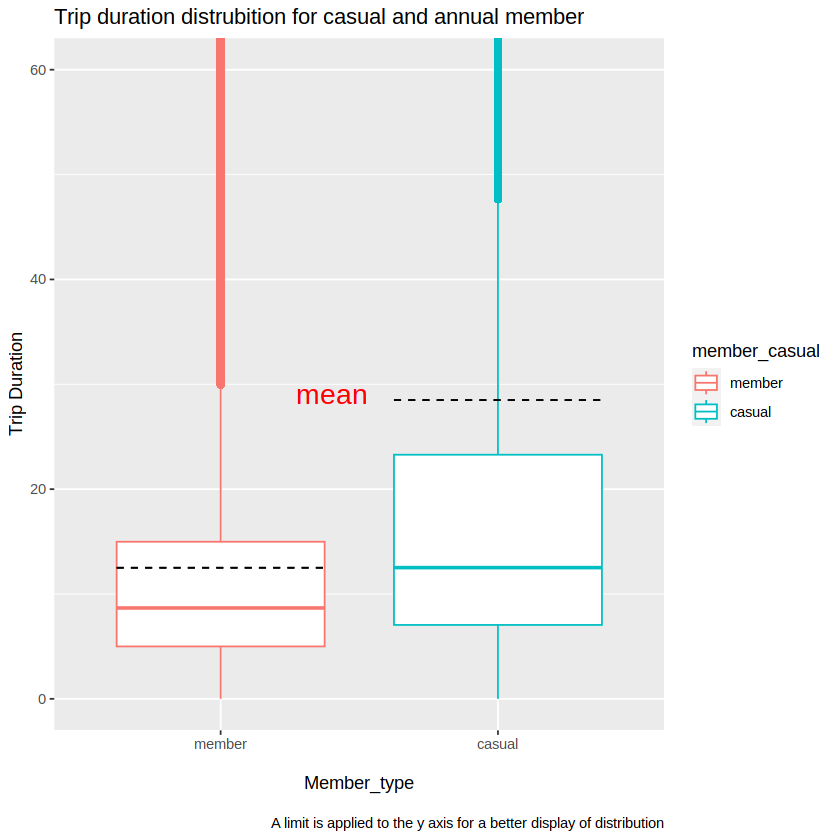

In [181]:
# plotting the distribution of trip duration
trip_data %>% ggplot(mapping=aes(x = member_casual, y = abs(started_at - ended_at)/60)) + 
  geom_boxplot(mapping=aes(color=member_casual)) +
  labs(x="\nMember_type",
       y="Trip Duration", 
       title= "Trip duration distrubition for casual and annual member", 
       caption= "\n A limit is applied to the y axis for a better display of distribution")+
  coord_cartesian(ylim = c(0, 60))+
  stat_summary(fun.y = mean, geom = "errorbar", aes(ymax = ..y.., ymin = ..y..),
                 width = .75, linetype = "dashed")+
  annotate("text", x = 1.4 , y = 29, label = "mean", color="red", size=6)
   


Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.

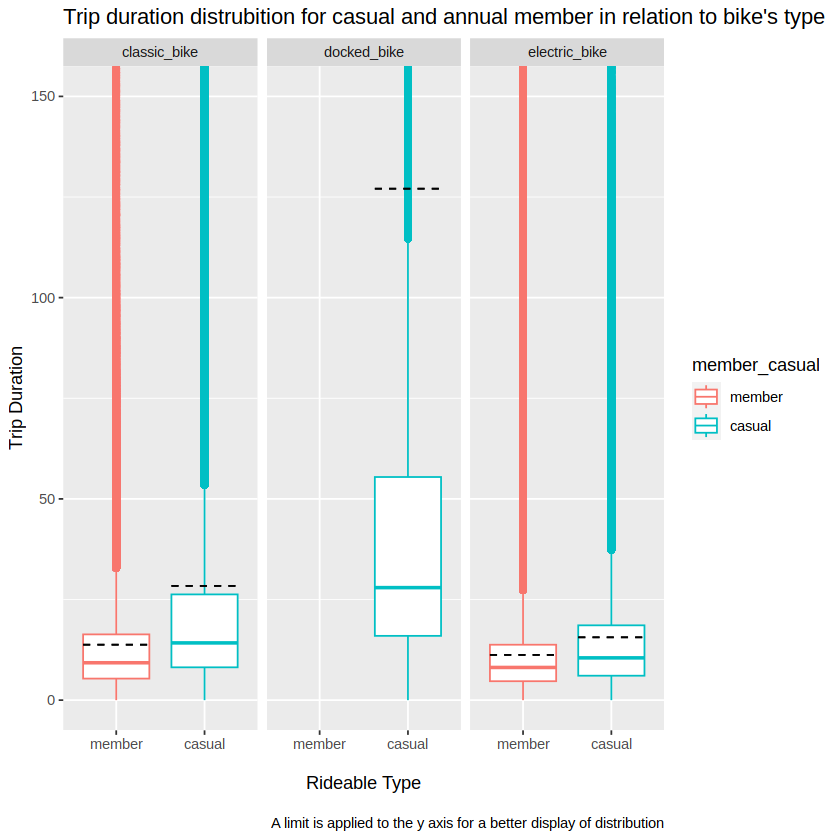

In [182]:
# Same plot but this time each rideable type on it's own graph
trip_data %>% ggplot(mapping=aes(x = member_casual, y = abs(started_at - ended_at)/60)) + 
  geom_boxplot(mapping=aes(color=member_casual)) +
  labs(x="\nRideable Type",
       y="Trip Duration", 
       title= "Trip duration distrubition for casual and annual member in relation to bike's type", 
       caption="\nA limit is applied to the y axis for a better display of distribution")+
   coord_cartesian(ylim = c(0, 150))+
   stat_summary(fun.y = mean, geom = "errorbar", aes(ymax = ..y.., ymin = ..y..),
                 width = .75, linetype = "dashed")+
  facet_wrap(~rideable_type)

   
  

##### Note:
- casual rider tend to spend more time biking with average of 16 minutes longuer than annual member
- 50% of casual riders uses bikes for a duration in the range of 7 to 23 minutes but some use it for a really long trip
- 50% of annual riders uses bikes for a duration in the range of 5 to 14 minutes but some use it for a long trip
- casual member tend to spend more time when using docked_bike and less time when using electric bike 
- annual member tend to use classic and electric bike in the same way with a slightly more time in favor to classic

#### 2.2 Trip by hour,day,month

##### 2.2.1 Trip by hour

`summarise()` has grouped output by 'hour(started_at)'. You can override using
the `.groups` argument.

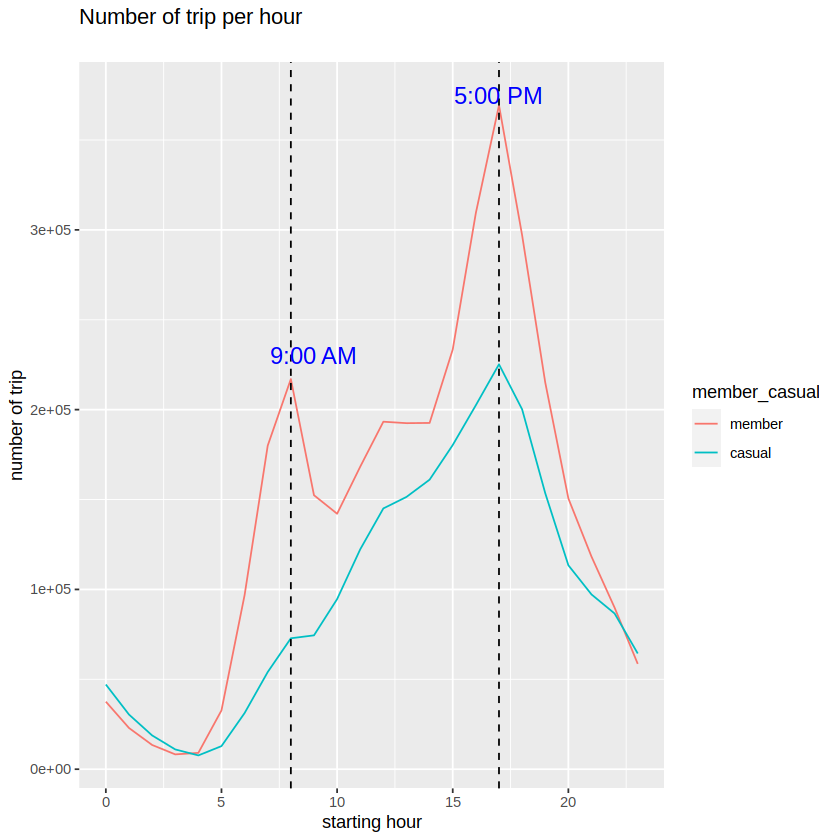

In [183]:
# plot_1: number of trips per hours(member_casual)

trip_data  %>%  
  group_by(hour(started_at), member_casual) %>% summarise(count=n()) %>% 
  ggplot(mapping=aes(x=`hour(started_at)`, y = count))+
  geom_line(mapping=aes(color=member_casual))  + 
  geom_vline(xintercept=c(8, 17), linetype="dashed")+
  annotate("text", x=9, y=230000, label="9:00 AM", color="blue", size=5 )+
  annotate("text", x=17, y=375000, label="5:00 PM", color="blue", size=5 )+
  labs(x="starting hour", y="number of trip", title="Number of trip per hour \n")

  

`summarise()` has grouped output by 'hour(started_at)', 'member_casual'. You
can override using the `.groups` argument.

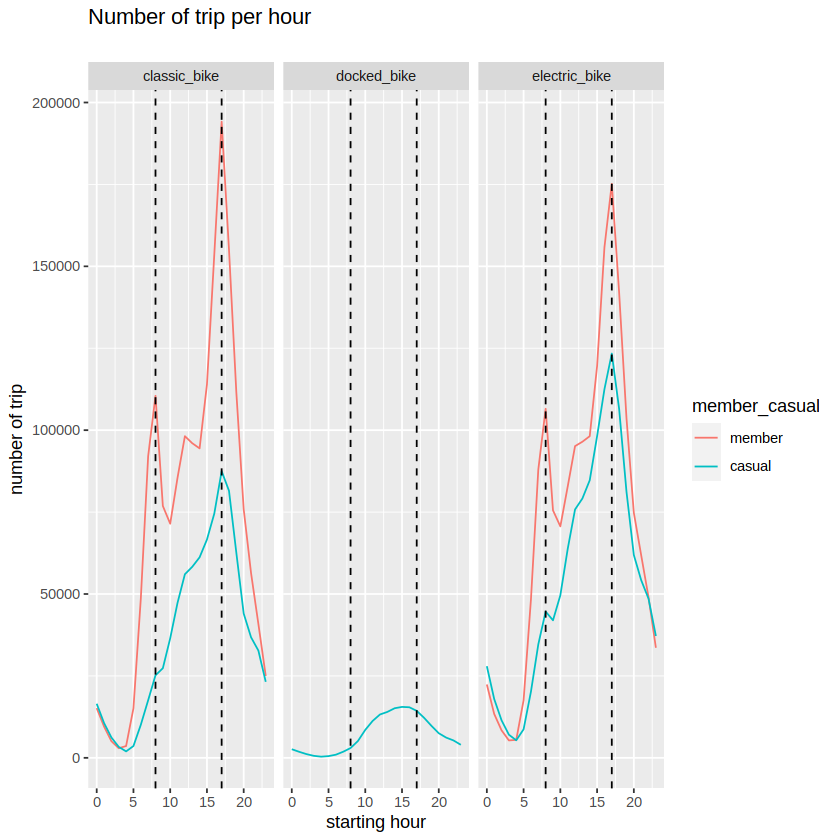

In [90]:
# plot_2: number of trips per hours(member_casual/rideable_type)

trip_data  %>%  
  group_by(hour(started_at), member_casual, rideable_type) %>% summarise(count=n()) %>% 
  ggplot(mapping=aes(x=`hour(started_at)`, y = count))+
  geom_line(mapping=aes(color=member_casual))  + 
  geom_vline(xintercept=c(8, 17), linetype="dashed")+
  labs(x="starting hour", y="number of trip", title="Number of trip per hour via in relation to rideable type\n")+
  facet_wrap(~rideable_type)

`summarise()` has grouped output by 'hour(started_at)'. You can override using
the `.groups` argument.Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.

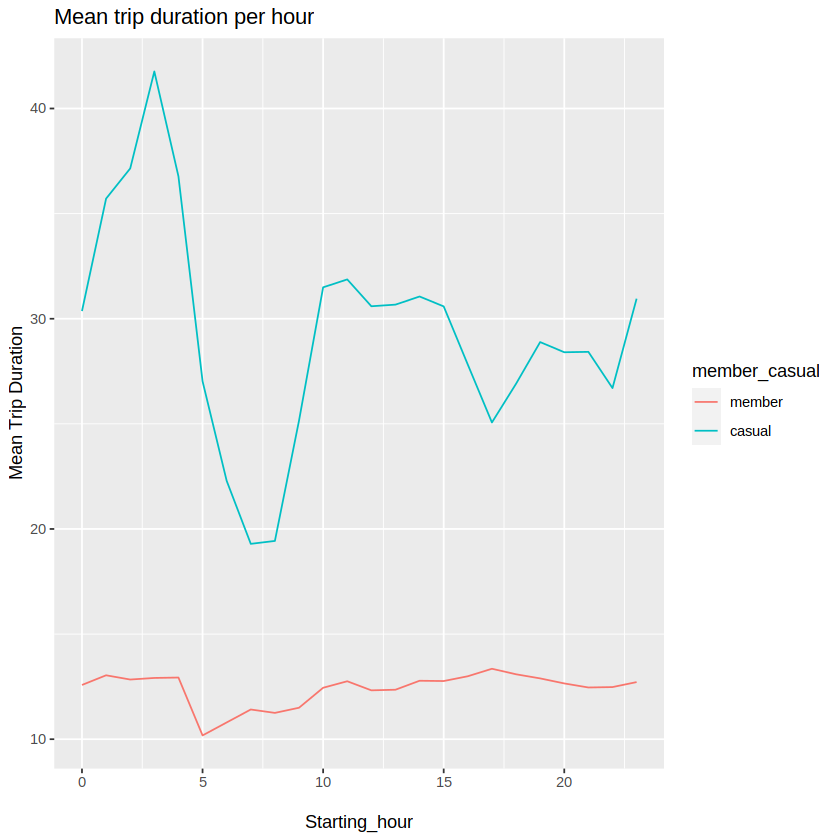

In [184]:
#plot_3: mean duration per hour for both customers
trip_data %>% 
  group_by(hour(started_at), member_casual) %>% 
  summarise(mean_dur = mean(abs(started_at - ended_at)/60)) %>% 
  ggplot(mapping= aes(x=`hour(started_at)`, y= mean_dur, color=member_casual))+
  geom_line()+
  labs(x="\nStarting_hour",
       y="Mean Trip Duration", 
       title= "Mean trip duration per hour")

`summarise()` has grouped output by 'hour(started_at)', 'member_casual'. You
can override using the `.groups` argument.Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.

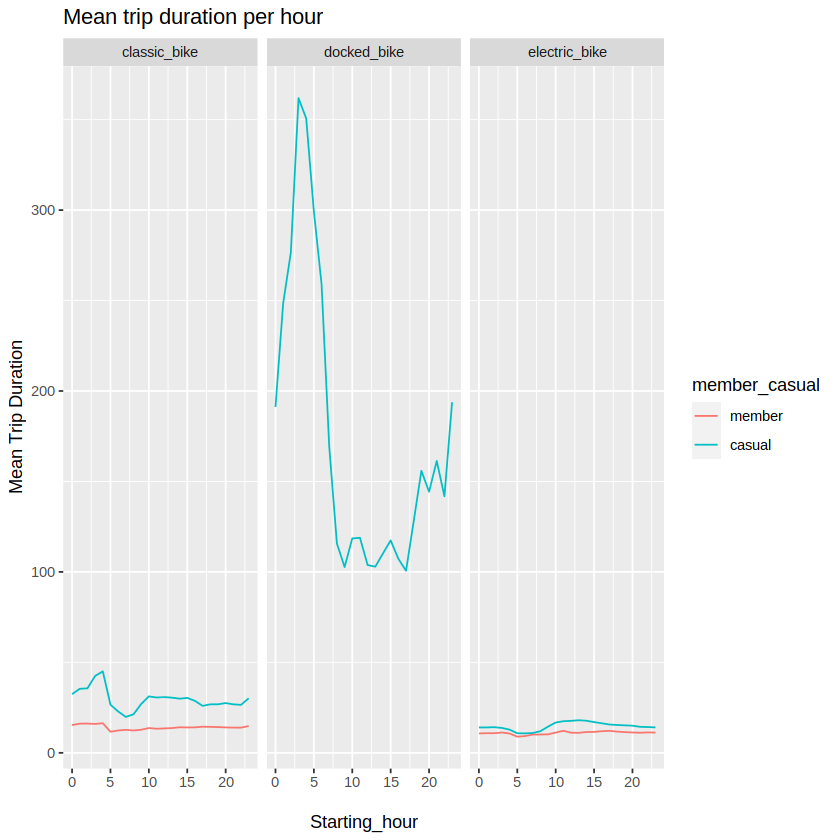

In [185]:
#plot_4: duration per hour for both customers
trip_data %>% 
  group_by(hour(started_at), member_casual,rideable_type) %>% 
  summarise(mean_dur = mean(abs(started_at - ended_at)/60)) %>% 
  ggplot(mapping= aes(x=`hour(started_at)`, y= mean_dur, color=member_casual))+
  geom_line()+
  labs(x="\nStarting_hour",
       y="Mean Trip Duration", 
       title= "Mean trip duration per hour")+
  facet_wrap(~rideable_type)


##### Note:
- most customer from both kind prefere to start their trip in the evening with a peak at around 5:00 PM
- A slight peak at around 9:00 AM for annual member
- longest trip  took place between midnight and 4:00 AM for casual member

###### 2.2.2 Trip by week_day

`summarise()` has grouped output by 'wday(...)'. You can override using the
`.groups` argument.

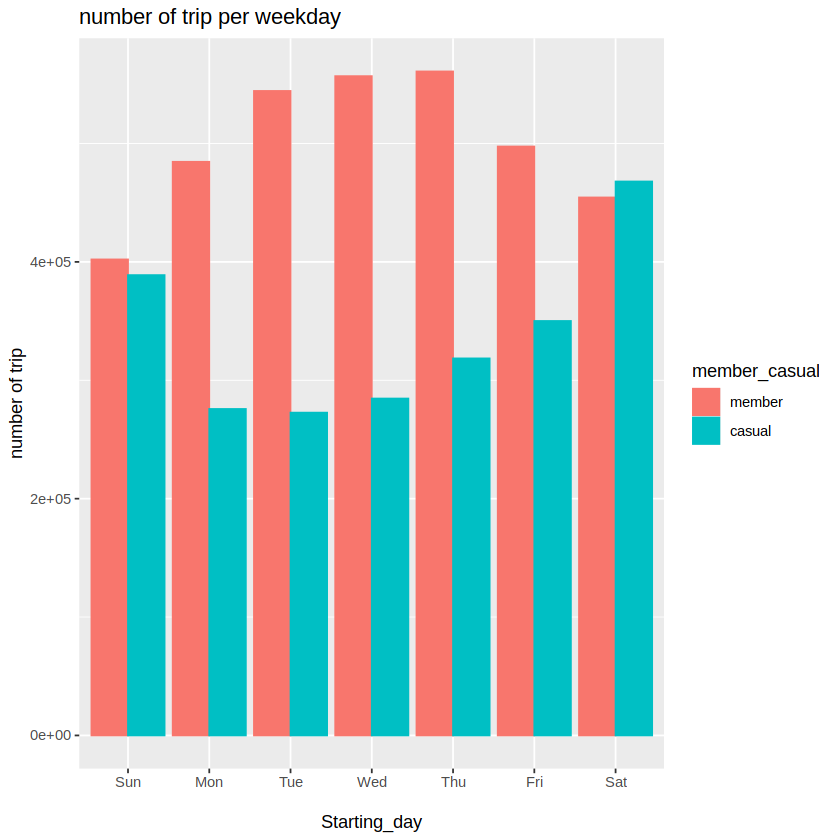

In [187]:
# plot_5: number of trip by weekday for both cutomer_type 
trip_data  %>%
  group_by(wday(started_at,
   label = TRUE,
   abbr = TRUE,
   week_start = getOption("lubridate.week.start", 7),
   locale = Sys.getlocale("LC_TIME")), member_casual) %>%
  summarise(count=n()) %>% 
  ggplot(mapping=aes(x=`wday(...)`, y=count, color=member_casual))+
  geom_bar(stat="identity", mapping=aes(fill=member_casual), position="dodge")+
  labs(x="\nStarting_day",
       y="number of trip", 
       title= "number of trip per weekday")
 


`summarise()` has grouped output by 'wday(...)', 'member_casual'. You can
override using the `.groups` argument.

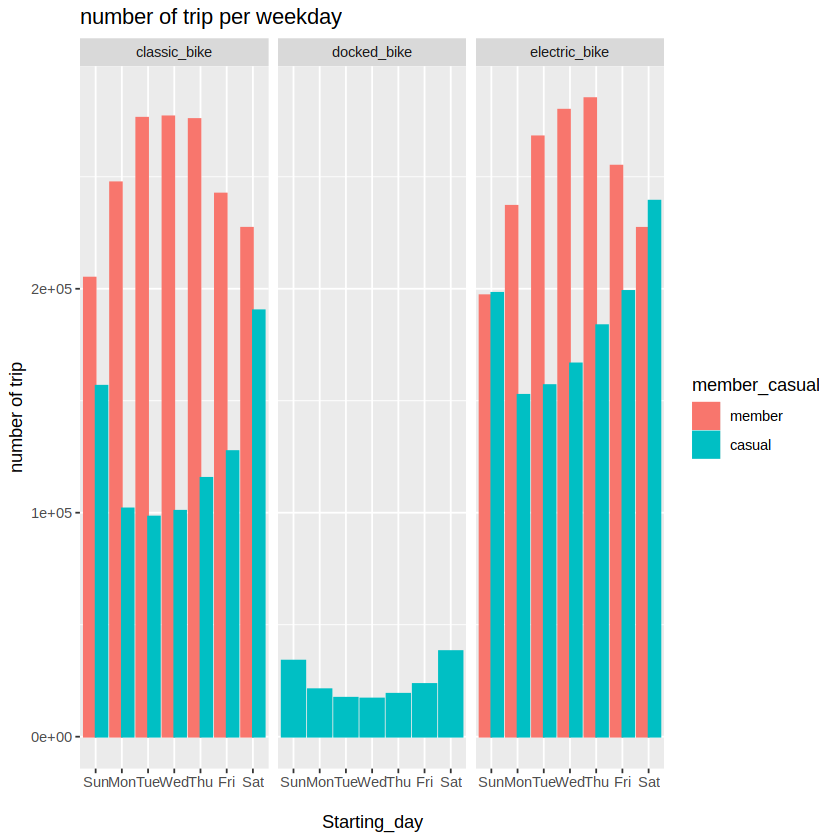

In [188]:
# plot_6:number of trip per weekday (member_casual, rideable_type) 
trip_data  %>%
  group_by(wday(started_at,
   label = TRUE,
   abbr = TRUE,
   week_start = getOption("lubridate.week.start", 7),
   locale = Sys.getlocale("LC_TIME")), member_casual, rideable_type) %>%
  summarise(count=n()) %>% 
  ggplot(mapping=aes(x=`wday(...)`, y=count, color=member_casual))+
  geom_bar(stat="identity", mapping=aes(fill=member_casual), position="dodge")+
  labs(x="\nStarting_day",
       y="number of trip", 
       title= "number of trip per weekday")+
  facet_wrap(~rideable_type)

`summarise()` has grouped output by 'wday(...)'. You can override using the
`.groups` argument.Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.

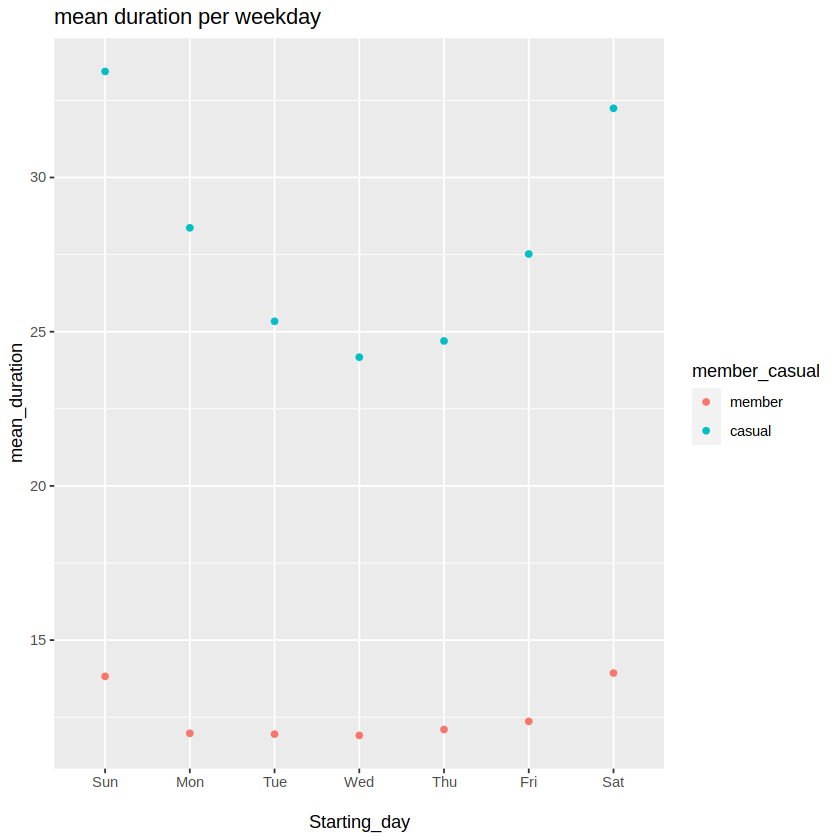

In [189]:
#plot_7: mean duration per weekday(member_casual)

trip_data  %>%
  group_by(wday(started_at,
   label = TRUE,
   abbr = TRUE,
   week_start = getOption("lubridate.week.start", 7),
   locale = Sys.getlocale("LC_TIME")), member_casual) %>% 
  summarise(mean_dur = mean(abs(started_at - ended_at)/60)) %>% 
  ggplot(aes(x=`wday(...)`, y=mean_dur, color=member_casual))+
  geom_point()+
  labs(x="\nStarting_day",
       y="mean_duration", 
       title= "mean duration per weekday")

`summarise()` has grouped output by 'wday(...)', 'member_casual'. You can
override using the `.groups` argument.Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.

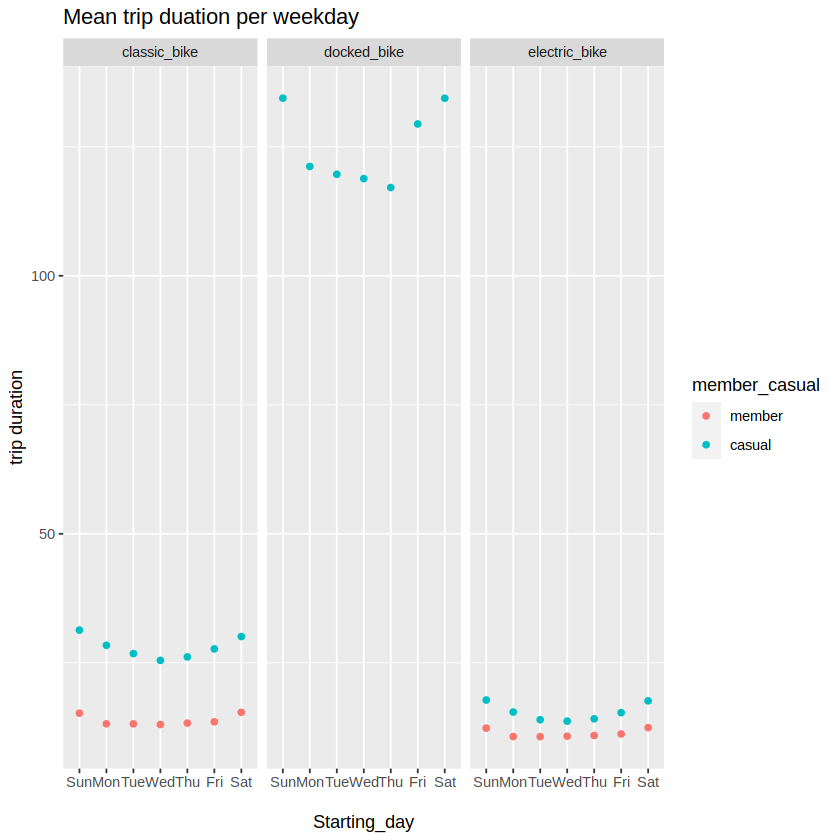

In [190]:
# plot_8: mean duration per weekday(member_casual,rideable type)
trip_data  %>%
  group_by(wday(started_at,
   label = TRUE,
   abbr = TRUE,
   week_start = getOption("lubridate.week.start", 7),
   locale = Sys.getlocale("LC_TIME")), member_casual, rideable_type) %>% 
  summarise(mean_dur = mean(abs(started_at - ended_at)/60)) %>% 
  ggplot(aes(x=`wday(...)`, y=mean_dur, color=member_casual))+
  geom_point()+
  labs(x="\nStarting_day",
       y="trip duration", 
       title= "Mean trip duation per weekday")+
  facet_wrap(~rideable_type)

#### quick notes:
 - casual customers prefer to made more trips on the weekend 
 - annal member on the other side made more trips during workdays
 - both casual and annual customer spent more biking time on the weekend

###### 2.2.3 Trip by day

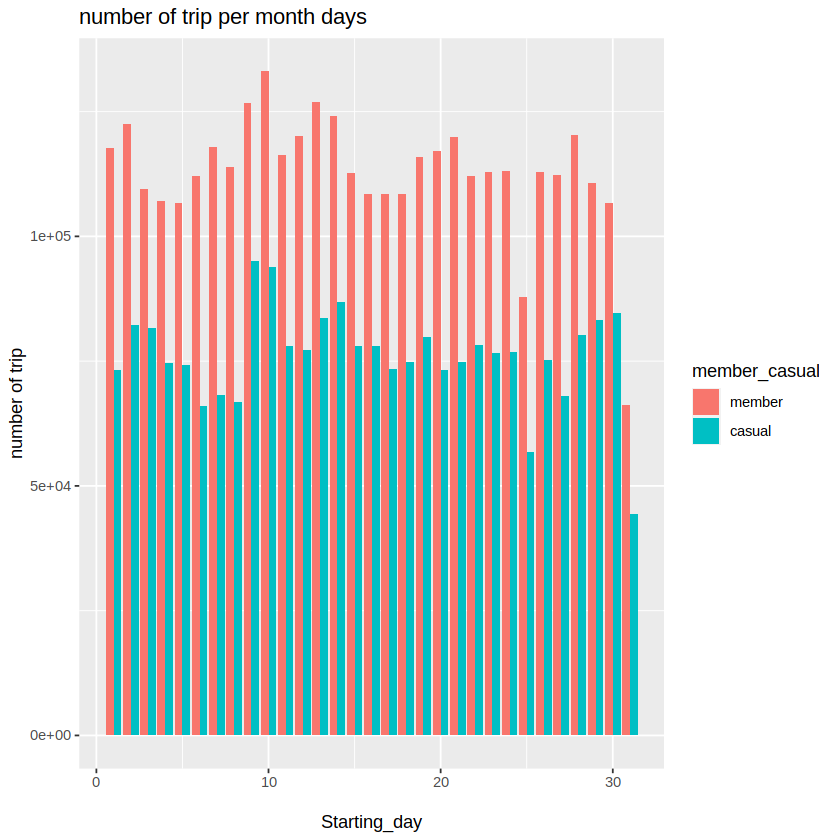

In [197]:
# plot_9:the number of trip by day for both cutomer_type 
trip_data  %>%
  group_by(day(started_at), member_casual, rideable_type) %>% 
  ggplot(mapping=aes(x=`day(started_at)`))+
  geom_bar(mapping=aes(fill=member_casual), position="dodge")+
  labs(x="\nStarting_day",
       y="number of trip", 
       title= "number of trip per month days")

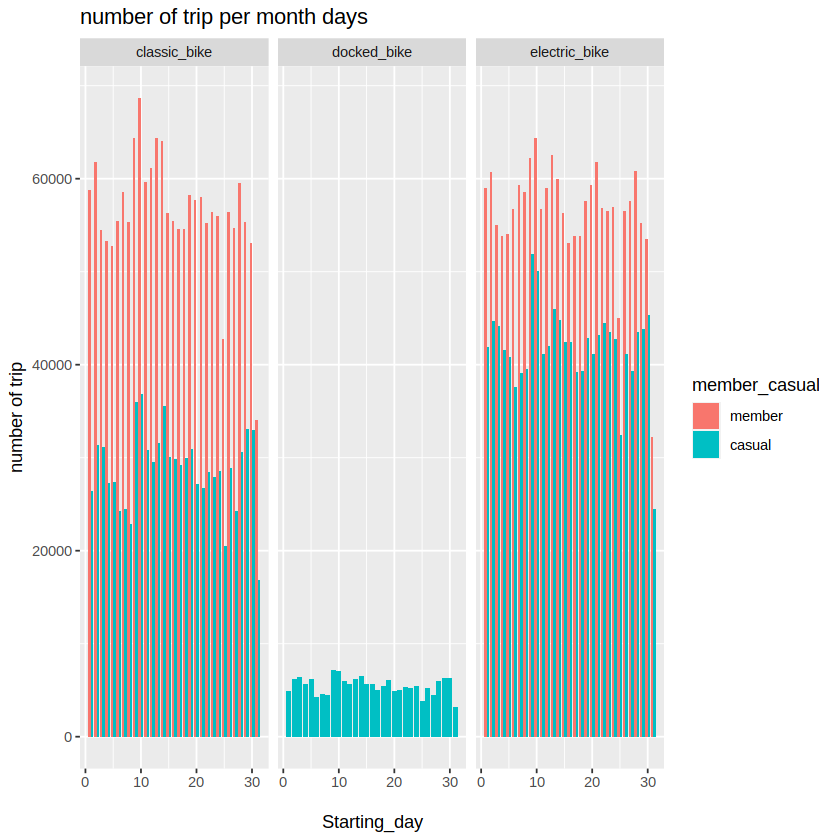

In [195]:
# plot_10: number_of trip by month days(customer type/ rideable type)
trip_data  %>%
  group_by(day(started_at), member_casual, rideable_type) %>% 
  ggplot(mapping=aes(x=`day(started_at)`))+
  geom_bar(mapping=aes(fill=member_casual), position="dodge")+
  labs(x="\nStarting_day",
       y="number of trip", 
       title= "number of trip per month days")+
  facet_wrap(~rideable_type)

`summarise()` has grouped output by 'day(started_at)'. You can override using
the `.groups` argument.Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.

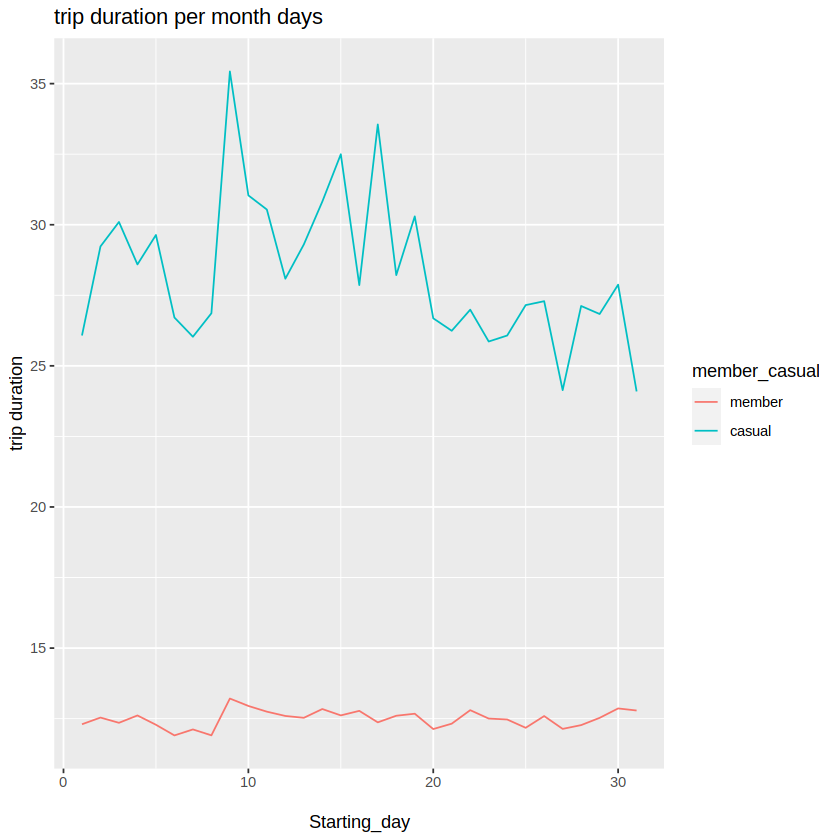

In [196]:
# plot_11: mean duration accros month days
trip_data  %>%
  group_by(day(started_at), member_casual) %>% 
  summarise(mean_dur = mean(abs(started_at - ended_at)/60)) %>% 
  ggplot(aes(x=`day(started_at)`, y=mean_dur, color=member_casual))+
  geom_line()+
  labs(x="\nStarting_day",
       y="trip duration", 
       title= "trip duration per month days")

`summarise()` has grouped output by 'day(started_at)', 'member_casual'. You can
override using the `.groups` argument.Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.

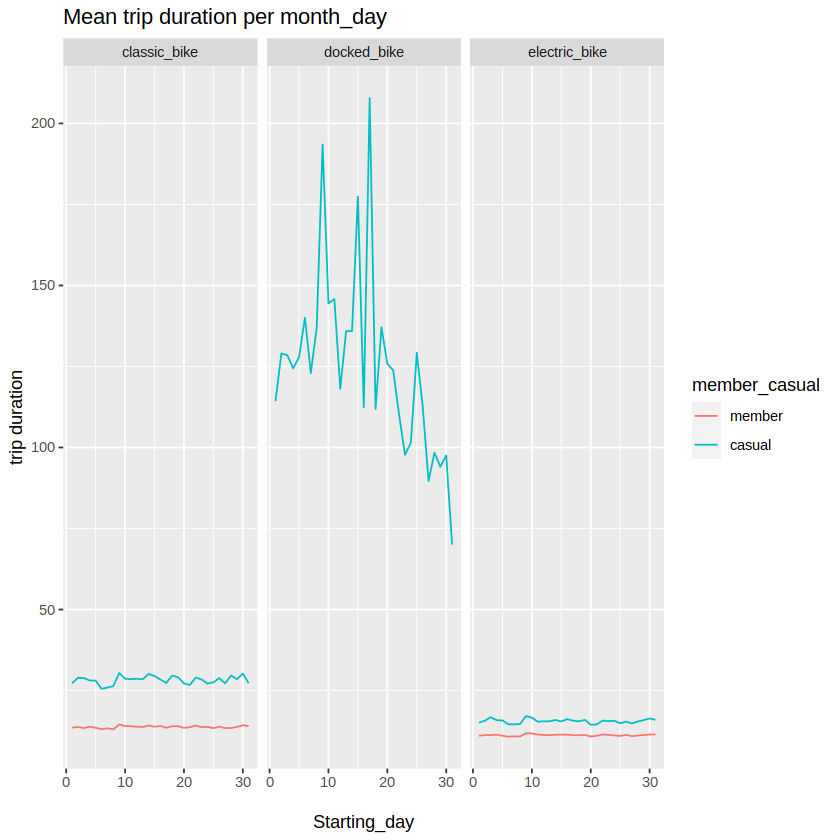

In [199]:
# plot_12: mean duration during month days(annual_customer,rideable type)
trip_data  %>%
  group_by(day(started_at), member_casual, rideable_type) %>% 
  summarise(mean_dur = mean(abs(started_at - ended_at)/60)) %>% 
  ggplot(aes(x=`day(started_at)`, y=mean_dur, color=member_casual))+
  geom_line()+
  labs(x="\nStarting_day",
       y="trip duration", 
       title= "Mean trip duration per month_day")+
  facet_wrap(~rideable_type)

#### Quick notes:
- no clear pattern in term of number of trip
- trip duration seems to be the same except for docked bikes when user tend to made longer trip on the 8th ,15th and 18th each month  

###### 2.2.4 Trip by month

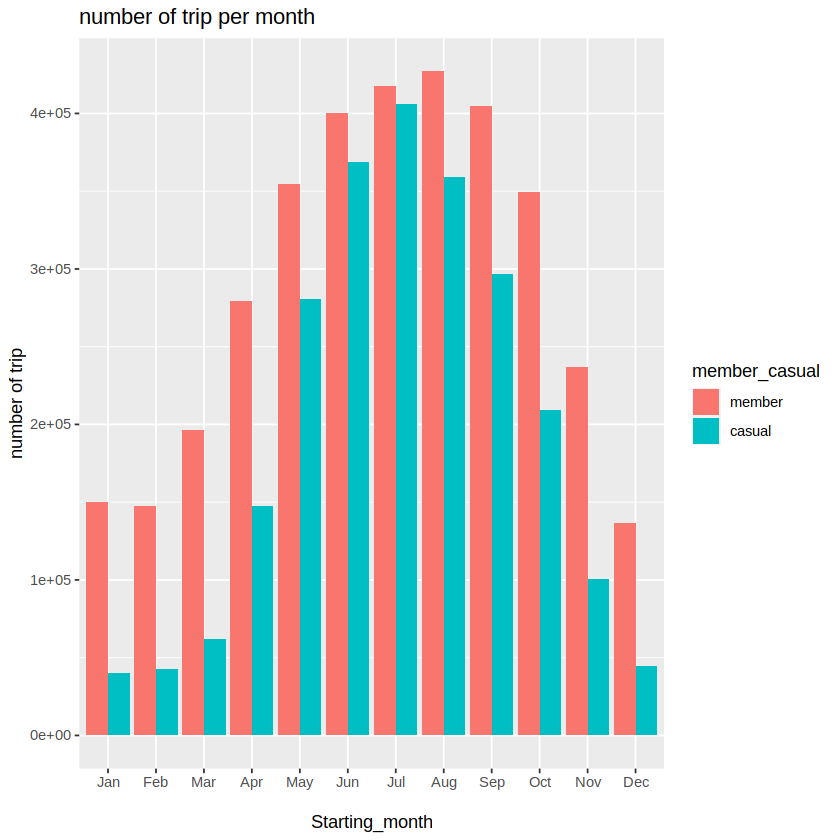

In [201]:
# plot_13:the number of trip per month for both cutomer_type 
trip_data  %>%
  group_by(month(started_at, label = TRUE, abbr = TRUE, locale = Sys.getlocale("LC_TIME")), member_casual, rideable_type) %>% 
  ggplot(mapping=aes(x=`month(started_at, label = TRUE, abbr = TRUE, locale = Sys.getlocale("LC_TIME"))`))+
  geom_bar(mapping=aes(fill=member_casual), position="dodge")+
  labs(x="\nStarting_month",
       y="number of trip", 
       title= "number of trip per month")

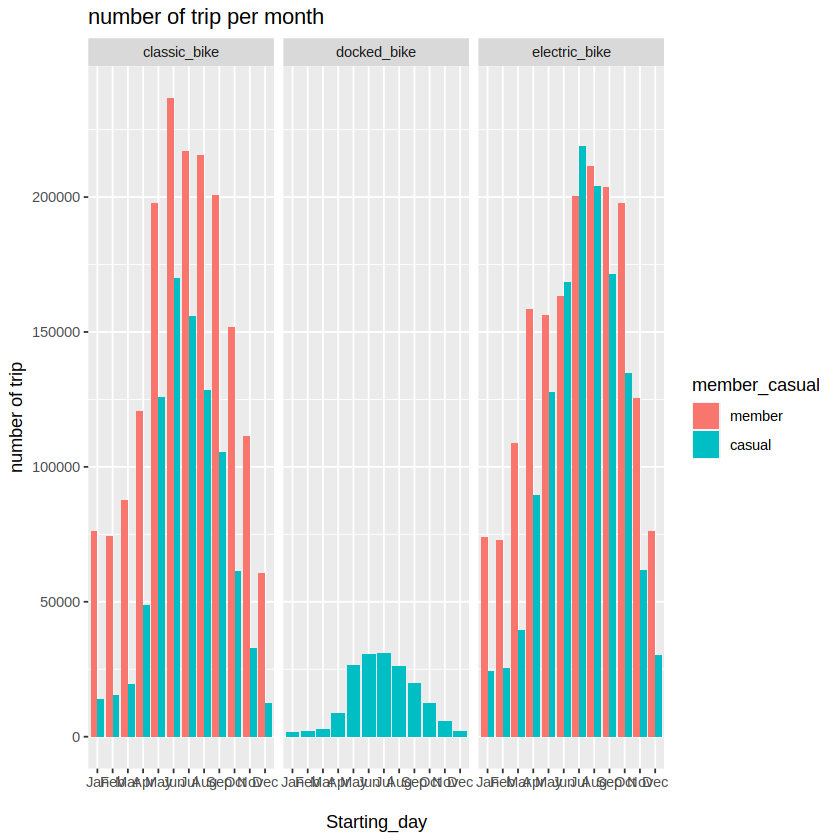

In [205]:
# plot14: number of trip per month (cutomer_type, rideable_type) 
trip_data  %>%
  group_by(month(started_at, label = TRUE, abbr = TRUE, locale = Sys.getlocale("LC_TIME")), member_casual, rideable_type) %>% 
  ggplot(mapping=aes(x=`month(started_at, label = TRUE, abbr = TRUE, locale = Sys.getlocale("LC_TIME"))`))+
  geom_bar(mapping=aes(fill=member_casual), position="dodge")+
  labs(x="\nStarting_day",
       y="number of trip", 
       title= "number of trip per month")+
  facet_wrap(~rideable_type)

`summarise()` has grouped output by 'month(started_at, label = TRUE, abbr =
TRUE, locale = Sys.getlocale("LC_TIME"))'. You can override using the `.groups`
argument.Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.

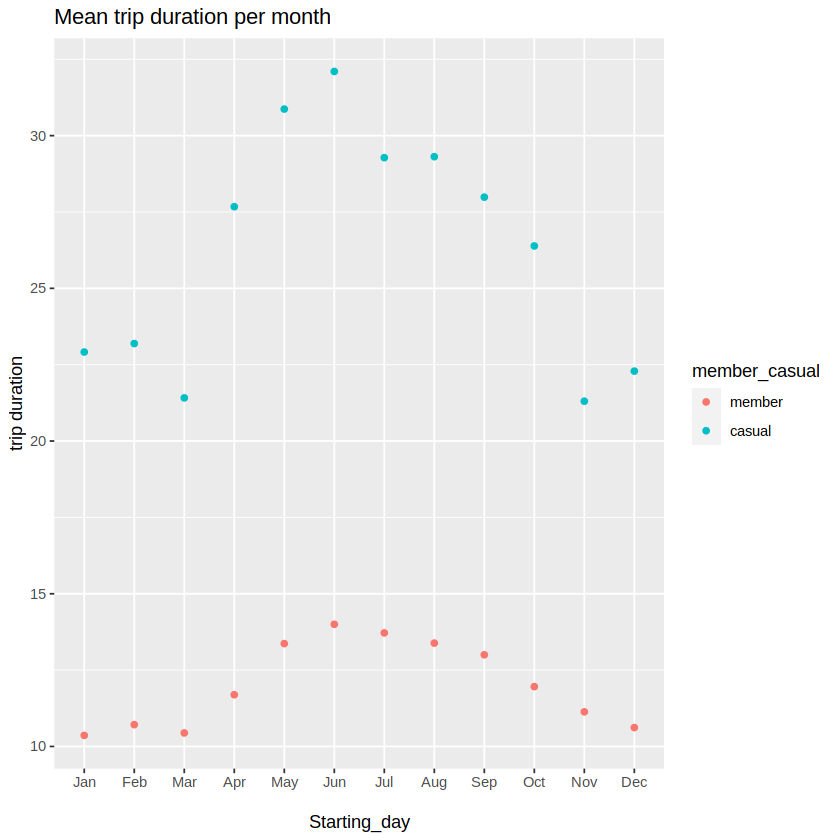

In [204]:
# plot 15: mean trip duration per month (member_casual, rideable type) 
trip_data  %>%
  group_by(month(started_at, label = TRUE, abbr = TRUE, locale = Sys.getlocale("LC_TIME")), member_casual) %>% 
  summarise(mean_dur = mean(abs(started_at - ended_at)/60)) %>% 
  ggplot(aes(x=`month(started_at, label = TRUE, abbr = TRUE, locale = Sys.getlocale("LC_TIME"))`, y=mean_dur, color=member_casual))+
  geom_point()+
  labs(x="\nStarting_day",
       y="trip duration", 
       title= "Mean trip duration per month")


`summarise()` has grouped output by 'month(started_at, label = TRUE, abbr =
TRUE, locale = Sys.getlocale("LC_TIME"))', 'member_casual'. You can override
using the `.groups` argument.Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.

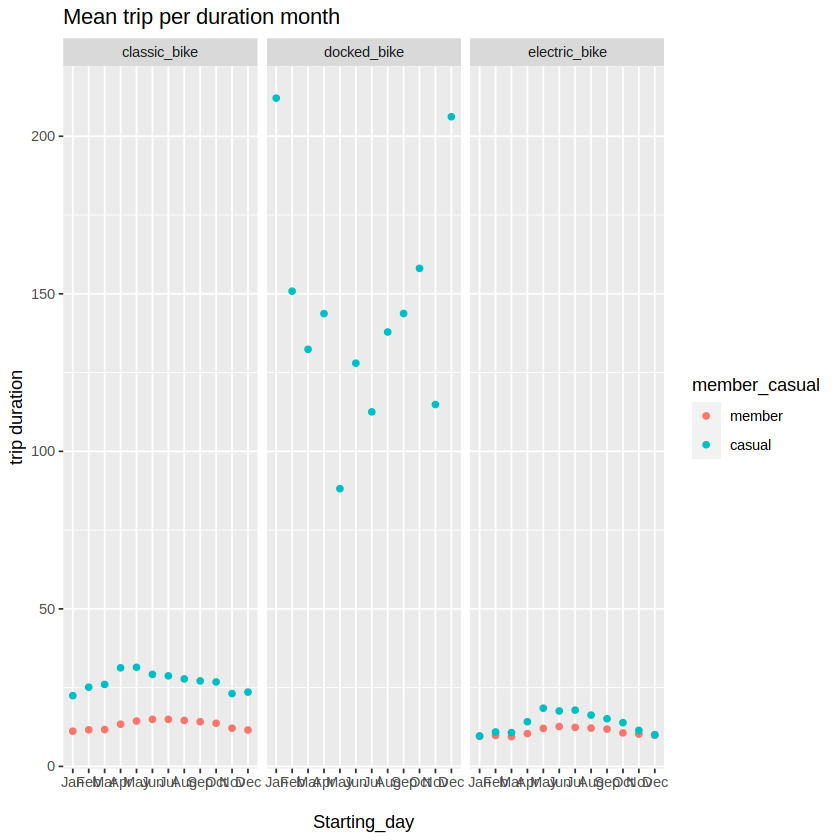

In [206]:
#plot_16 mean trip duration per month (member_casual, rideable type)
trip_data  %>%
  group_by(month(started_at, label = TRUE, abbr = TRUE, locale = Sys.getlocale("LC_TIME")), member_casual, rideable_type) %>% 
  summarise(mean_dur = mean(abs(started_at - ended_at)/60)) %>% 
  ggplot(aes(x=`month(started_at, label = TRUE, abbr = TRUE, locale = Sys.getlocale("LC_TIME"))`, y=mean_dur, color=member_casual))+
  geom_point()+
  labs(x="\nStarting_day",
       y="trip duration", 
       title= "Mean trip per duration month")+
  facet_wrap(~rideable_type)

##### Quick notes:
- customers from both type tend to made more trips during warm months
- And they made longer trip as well except when using docked bikes which shows an inversed pattern

### 3.distance travelled and preferable routes

##### 3.1 More data cleaning 

In [207]:
# dropping empty rows
trip_data <- trip_data %>% drop_na()

In [208]:
# recheck data
t(skim_without_charts(trip_data))

,1,2,3,4,5,6,7,8,9
skim_type,POSIXct,POSIXct,Timespan,factor,factor,numeric,numeric,numeric,numeric
skim_variable,started_at,ended_at,trip_dur,rideable_type,member_casual,start_lng,start_lat,end_lng,end_lat
n_missing,0,0,0,0,0,0,0,0,0
complete_rate,1,1,1,1,1,1,1,1,1
POSIXct.min,2022-05-01 00:00:06,2022-05-01 00:05:17,NA,NA,NA,NA,NA,NA,NA
POSIXct.max,2023-04-30 23:59:05,2023-05-01 08:06:56,NA,NA,NA,NA,NA,NA,NA
POSIXct.median,2022-08-28 13:00:14,2022-08-28 13:20:19,NA,NA,NA,NA,NA,NA,NA
POSIXct.n_unique,4912177,4925690,NA,NA,NA,NA,NA,NA,NA
Timespan.min,NA,NA,0,NA,NA,NA,NA,NA,NA
Timespan.max,NA,NA,59,NA,NA,NA,NA,NA,NA


In [139]:
# add a column to calculate distance travelled
trip_distance <- trip_data %>% 
filter(start_lng != end_lng & start_lat != end_lat) %>% rowwise() %>%
  mutate(ride_dist = distm(c(start_lng, start_lat), c(end_lng, end_lat)))
trip_distance

rideable_type,started_at,ended_at,start_lng,start_lat,end_lng,end_lat,member_casual,trip_dur,ride_dist
classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,-87.62676,41.89147,-87.64895,41.94367,member,33M 21S,6083.5539
classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,-87.61674,41.88096,-87.61752,41.88635,member,37M 54S,602.2233
classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,-87.64107,41.88224,-87.67255,41.90765,member,21M 50S,3846.3945
classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,-87.64107,41.88224,-87.63189,41.88458,member,8M 42S,804.5508
classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,-87.64107,41.88224,-87.65102,41.88578,member,5M 1S,915.1972
classic_bike,2022-05-04 14:48:55,2022-05-04 14:56:04,-87.65345,41.89456,-87.65110,41.88316,member,7M 9S,1280.1432
classic_bike,2022-05-27 12:41:48,2022-05-27 12:50:41,-87.66260,41.90068,-87.67220,41.89918,member,8M 53S,813.8255
docked_bike,2022-05-29 19:19:24,2022-05-29 19:31:34,-87.64908,41.92914,-87.66371,41.92077,casual,12M 10S,1529.1706
classic_bike,2022-05-16 17:48:44,2022-05-16 18:05:26,-87.64107,41.88224,-87.64055,41.90461,member,16M 42S,2485.1403
electric_bike,2022-05-11 07:29:29,2022-05-11 07:30:57,-87.66401,41.94807,-87.66000,41.94000,member,1M 28S,955.8033


#### 3.2 distance travelled

In [209]:
# check correlation between trip duration and distance travelled
cor(as.numeric(abs(trip_distance$started_at - trip_distance$ended_at)), trip_distance$ride_dist)

0.03700587


- correlation too close to 0 so deeper analysis needed

In [160]:
# summary of trip distance for casual/annual customer
casual_distance <-trip_distance %>% filter(member_casual == "casual")
member_distance <-trip_distance %>% filter(member_casual == "member")
summary(casual_distance$ride_dist)
summary(member_distance$ride_dist)

       V1         
 Min.   :      0  
 1st Qu.:   1092  
 Median :   1789  
 Mean   :   2347  
 3rd Qu.:   2977  
 Max.   :9817319  

       V1         
 Min.   :      0  
 1st Qu.:    930  
 Median :   1581  
 Mean   :   2196  
 3rd Qu.:   2812  
 Max.   :9816617  

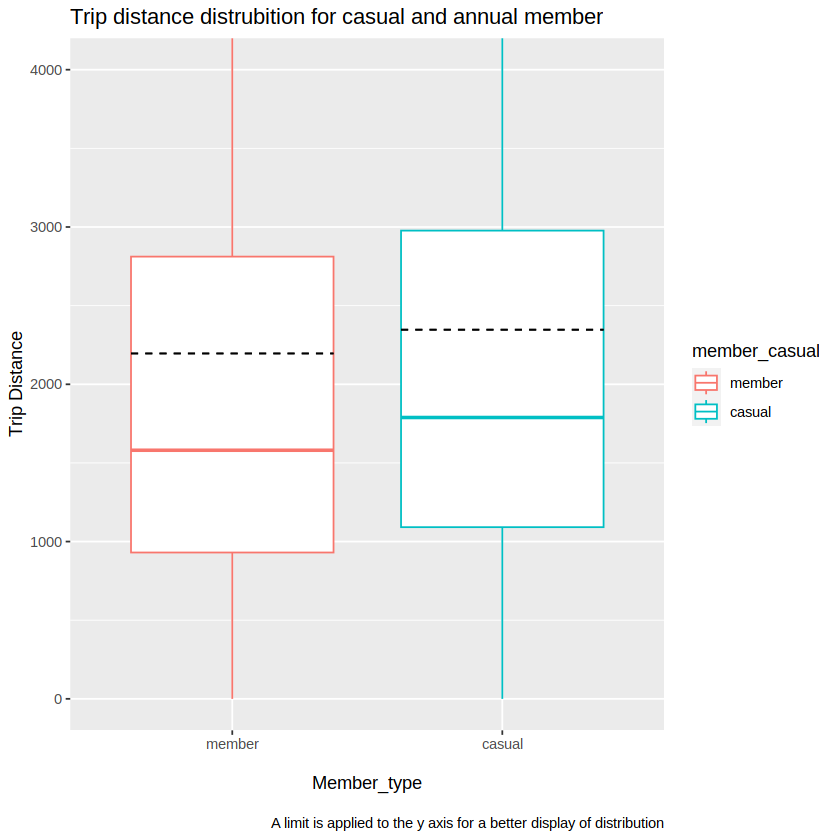

In [148]:
# plot_17 distance distribution(member_casual)
trip_distance %>% ggplot(mapping=aes(x = member_casual, y = ride_dist)) + 
  geom_boxplot(mapping=aes(color=member_casual)) +
  coord_cartesian(ylim = c(0, 4000))+
  labs(x="\nMember_type",
       y="Trip Distance", 
       title= "Trip distance distrubition for casual and annual member", 
       caption= "\n A limit is applied to the y axis for a better display of distribution")+
  stat_summary(fun.y = mean, geom = "errorbar", aes(ymax = ..y.., ymin = ..y..),
                 width = .75, linetype = "dashed")
  

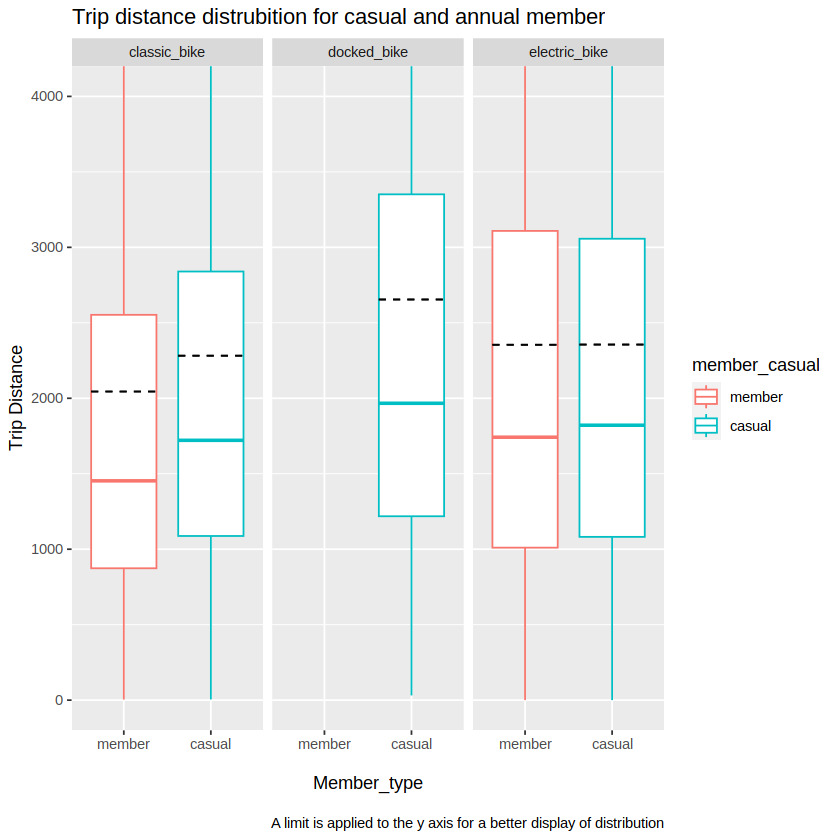

In [210]:
# plot_18: distance distribution (member_casual, rideable_type)
trip_distance %>% ggplot(mapping=aes(x = member_casual, y = ride_dist)) + 
  geom_boxplot(mapping=aes(color=member_casual)) +
  coord_cartesian(ylim = c(0, 4000))+
  labs(x="\nMember_type",
       y="Trip Distance", 
       title= "Trip distance distrubition for casual and annual member", 
       caption= "\n A limit is applied to the y axis for a better display of distribution")+
  stat_summary(fun.y = mean, geom = "errorbar", aes(ymax = ..y.., ymin = ..y..),
                 width = .75, linetype = "dashed")+
  facet_wrap(~rideable_type)

`summarise()` has grouped output by 'hour(started_at)'. You can override using
the `.groups` argument.

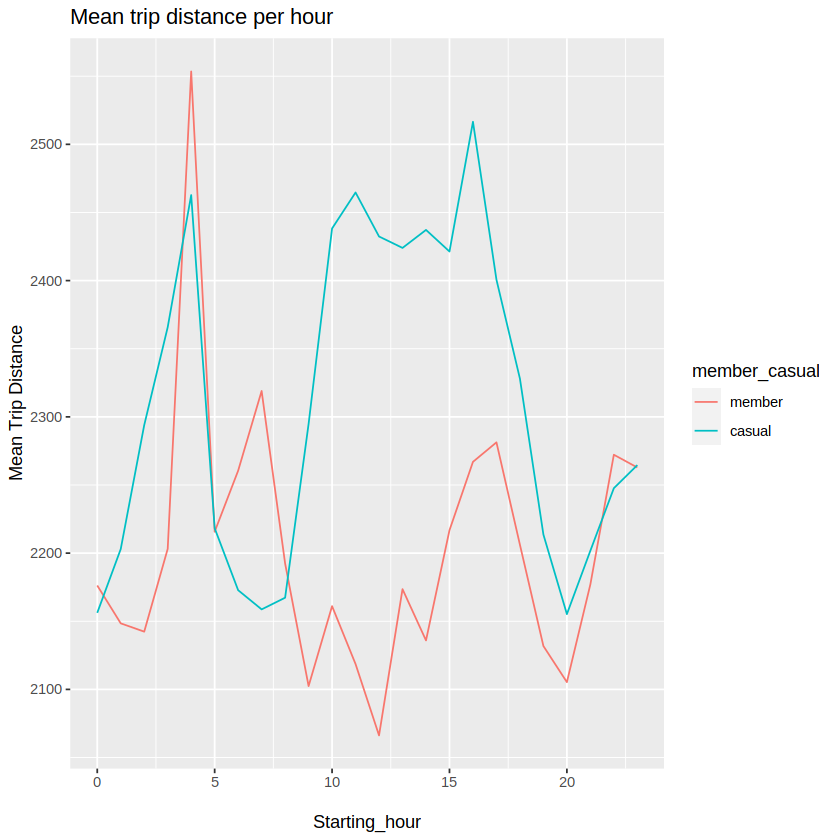

In [211]:
#plot_19: mean trip distance by hour(member_casual)
trip_distance %>% 
  group_by(hour(started_at), member_casual) %>% 
  summarise(mean_dist = mean(ride_dist)) %>% 
  ggplot(mapping= aes(x=`hour(started_at)`, y= mean_dist, color=member_casual))+
  geom_line()+
  labs(x="\nStarting_hour",
       y="Mean Trip Distance", 
       title= "Mean trip distance per hour")

`summarise()` has grouped output by 'hour(started_at)', 'member_casual'. You
can override using the `.groups` argument.

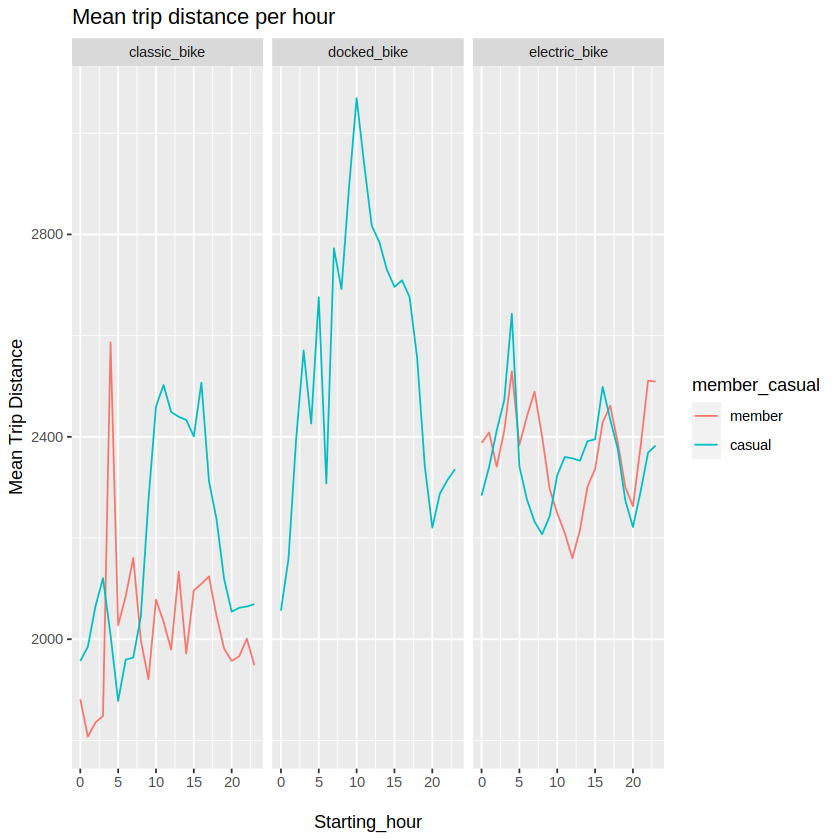

In [212]:
#plot20: mean trip distance per hour(member_casual, rideable_type)
trip_distance %>% 
  group_by(hour(started_at), member_casual,rideable_type) %>% 
  summarise(mean_dist = mean(ride_dist)) %>% 
  ggplot(mapping= aes(x=`hour(started_at)`, y= mean_dist, color=member_casual))+
  geom_line()+
  labs(x="\nStarting_hour",
       y="Mean Trip Distance", 
       title= "Mean trip distance per hour")+
  facet_wrap(~rideable_type)

`summarise()` has grouped output by 'wday(...)'. You can override using the
`.groups` argument.

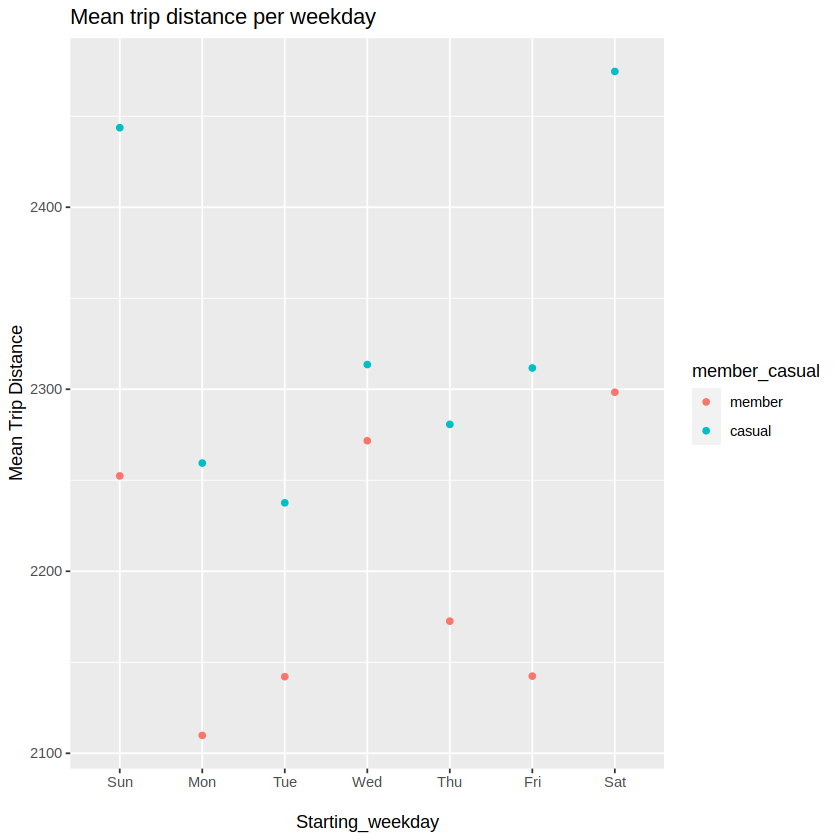

In [213]:
#plot_21:mean trip distance per weekday(member_casual)
trip_distance  %>%
  group_by(wday(started_at,
   label = TRUE,
   abbr = TRUE,
   week_start = getOption("lubridate.week.start", 7),
   locale = Sys.getlocale("LC_TIME")), member_casual) %>% 
  summarise(mean_dist = mean(ride_dist)) %>% 
  ggplot(aes(x=`wday(...)`, y=mean_dist, color=member_casual))+
  geom_point()+
  labs(x="\nStarting_weekday",
       y="Mean Trip Distance", 
       title= "Mean trip distance per weekday")

`summarise()` has grouped output by 'wday(...)', 'member_casual'. You can
override using the `.groups` argument.

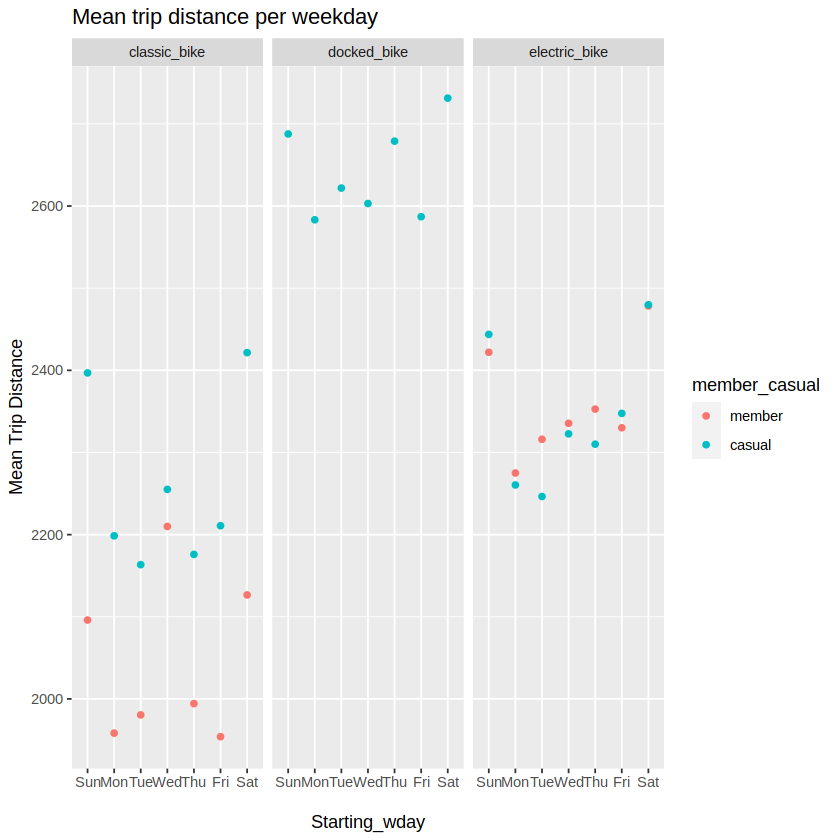

In [214]:
# plot_22: trip_distance per wday(member_casual, rideable_type)
trip_distance  %>%
  group_by(wday(started_at,
   label = TRUE,
   abbr = TRUE,
   week_start = getOption("lubridate.week.start", 7),
   locale = Sys.getlocale("LC_TIME")), member_casual, rideable_type) %>% 
  summarise(mean_dist = mean(ride_dist)) %>% 
  ggplot(aes(x=`wday(...)`, y=mean_dist, color=member_casual))+
  geom_point()+
  labs(x="\nStarting_wday",
       y="Mean Trip Distance", 
       title= "Mean trip distance per weekday")+
  facet_wrap(~rideable_type)

`summarise()` has grouped output by 'day(started_at)'. You can override using
the `.groups` argument.

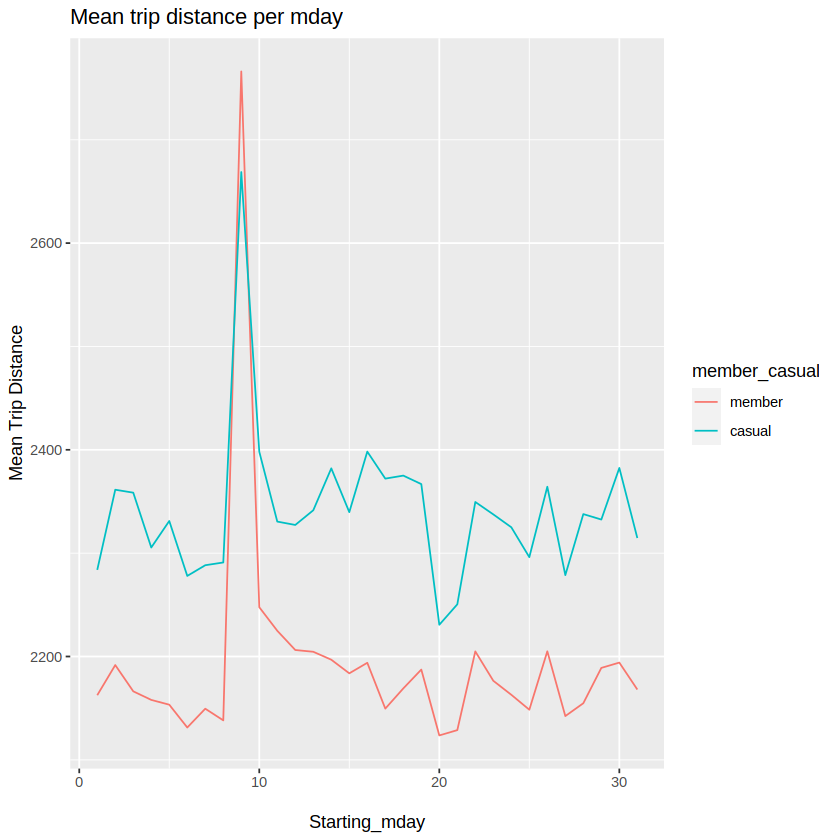

In [215]:
# plot23: mean trip distance per mdays(member_casual)
trip_distance  %>%
  group_by(day(started_at), member_casual) %>% 
  summarise(mean_dist = mean(ride_dist)) %>% 
  ggplot(aes(x=`day(started_at)`, y=mean_dist, color=member_casual))+
  geom_line()+
  labs(x="\nStarting_mday",
       y="Mean Trip Distance", 
       title= "Mean trip distance per mday")

`summarise()` has grouped output by 'day(started_at)', 'member_casual'. You can
override using the `.groups` argument.

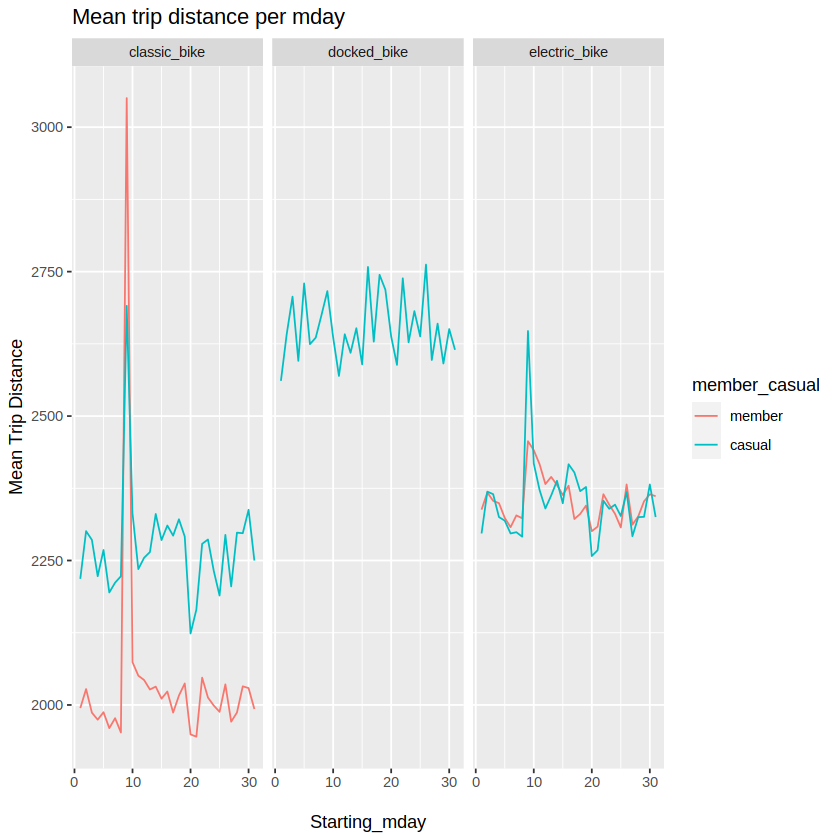

In [216]:
# plot_24 mean trip distance per mday(member_casual, rideable_type)
trip_distance  %>%
  group_by(day(started_at), member_casual, rideable_type) %>% 
  summarise(mean_dist = mean(ride_dist)) %>% 
  ggplot(aes(x=`day(started_at)`, y=mean_dist, color=member_casual))+
  geom_line()+
  labs(x="\nStarting_mday",
       y="Mean Trip Distance", 
       title= "Mean trip distance per mday")+
  facet_wrap(~rideable_type)

`summarise()` has grouped output by 'month(started_at, label = TRUE, abbr =
TRUE, locale = Sys.getlocale("LC_TIME"))'. You can override using the `.groups`
argument.

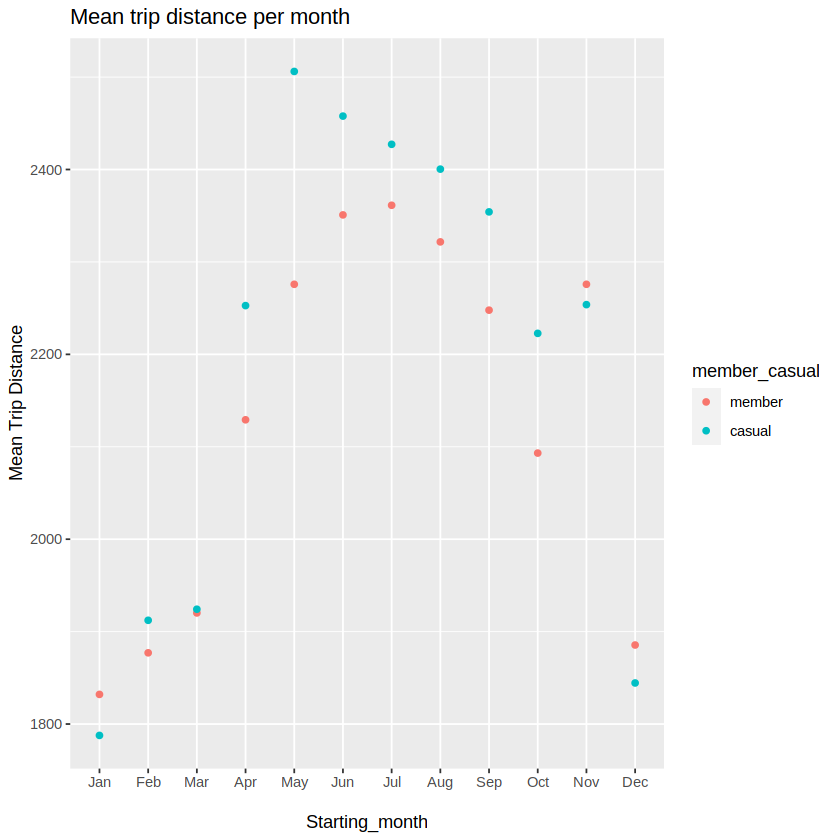

In [217]:
# plot_25: mean trip distance per month(member_casual)
trip_distance  %>%
  group_by(month(started_at, label = TRUE, abbr = TRUE, locale = Sys.getlocale("LC_TIME")), member_casual) %>% 
  summarise(mean_dist = mean(ride_dist)) %>% 
  ggplot(aes(x=`month(started_at, label = TRUE, abbr = TRUE, locale = Sys.getlocale("LC_TIME"))`, y=mean_dist, color=member_casual))+
  geom_point()+
  labs(x="\nStarting_month",
       y="Mean Trip Distance", 
       title= "Mean trip distance per month")

`summarise()` has grouped output by 'month(started_at, label = TRUE, abbr =
TRUE, locale = Sys.getlocale("LC_TIME"))', 'member_casual'. You can override
using the `.groups` argument.

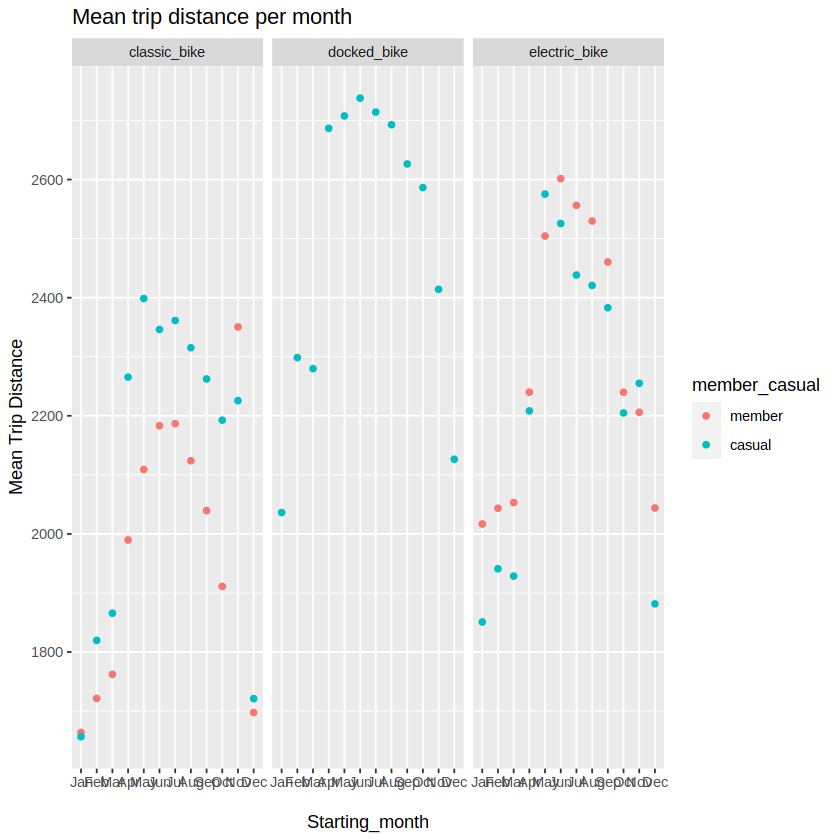

In [218]:
#plot_26:mean trip distance per month(member_casual, rideable_type)
trip_distance  %>%
  group_by(month(started_at, label = TRUE, abbr = TRUE, locale = Sys.getlocale("LC_TIME")), member_casual, rideable_type) %>% 
  summarise(mean_dist = mean(ride_dist)) %>% 
  ggplot(aes(x=`month(started_at, label = TRUE, abbr = TRUE, locale = Sys.getlocale("LC_TIME"))`, y=mean_dist, color=member_casual))+
  geom_point()+
  labs(x="\nStarting_month",
       y="Mean Trip Distance", 
       title= "Mean trip distance per month")+
  facet_wrap(~rideable_type)

#### Quick notes:
- the average distance travelled isn't correlated to the customer type neither to rideable type
- both kind of customer have a peack in distance at around 4:00 AM(exercise maybe)
- the average difference in distance is bigger during the day compared to night in favor of casual customer especially when using classic bike 
- casual customer made the longest trip during the weekend
- annual customer made the longest trip on wednesday and during the weekend
- both customer have a huge peak in the ninth of every month (need more historic data to make conclusion)
- longer trip been made in warm months

#### 3.3 prefered routes

In [219]:
# grouping and filtering data
routes <- trip_data %>% 
filter(start_lng != end_lng & start_lat != end_lat) %>%
group_by(start_lng, start_lat, end_lng, end_lat, member_casual) %>%
summarise(total = n(),.groups="drop") 


In [220]:
# recheck data
str(routes)

tibble [2,424,165 × 6] (S3: tbl_df/tbl/data.frame)
 $ start_lng    : num [1:2424165] -87.8 -87.8 -87.8 -87.8 -87.8 ...
 $ start_lat    : num [1:2424165] 41.9 42 42 42 42 ...
 $ end_lng      : num [1:2424165] -87.8 -87.8 -87.8 -87.8 -87.8 ...
 $ end_lat      : num [1:2424165] 42 41.9 42 41.9 41.9 ...
 $ member_casual: Factor w/ 2 levels "member","casual": 1 2 1 2 2 2 2 2 1 1 ...
 $ total        : int [1:2424165] 1 2 1 2 1 1 1 1 1 1 ...


In [221]:
# create 2 vble to hold routes for each customer_type
casual_routes <- routes  %>% filter(member_casual == "casual") 
member_routes <- routes  %>% filter(member_casual == "member")

In [222]:
# counting routes for each user type 
casual_routes  %>% count()
member_routes  %>% count()

n
1054989


n
1369176


In [223]:
# we will focus on the 200 most favourite routes for each customer type
casual_routes <- routes  %>% filter(member_casual == "casual")  %>% arrange(desc(total)) %>% head(n=200)
member_routes <- routes  %>% filter(member_casual == "member") %>% arrange(desc(total)) %>% head(n=200)

ℹ Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.Warning message:
“Removed 14 rows containing missing values (`geom_curve()`).”Coordinate system already present. Adding new coordinate system, which will
replace the existing one.Warning message:
“Removed 33 rows containing missing values (`geom_curve()`).”

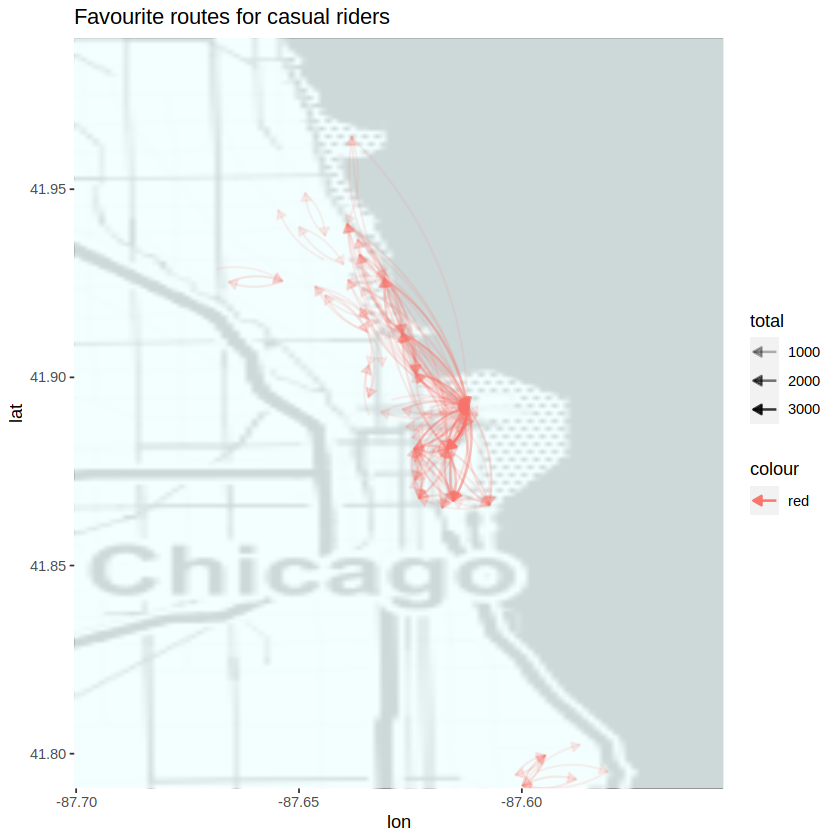

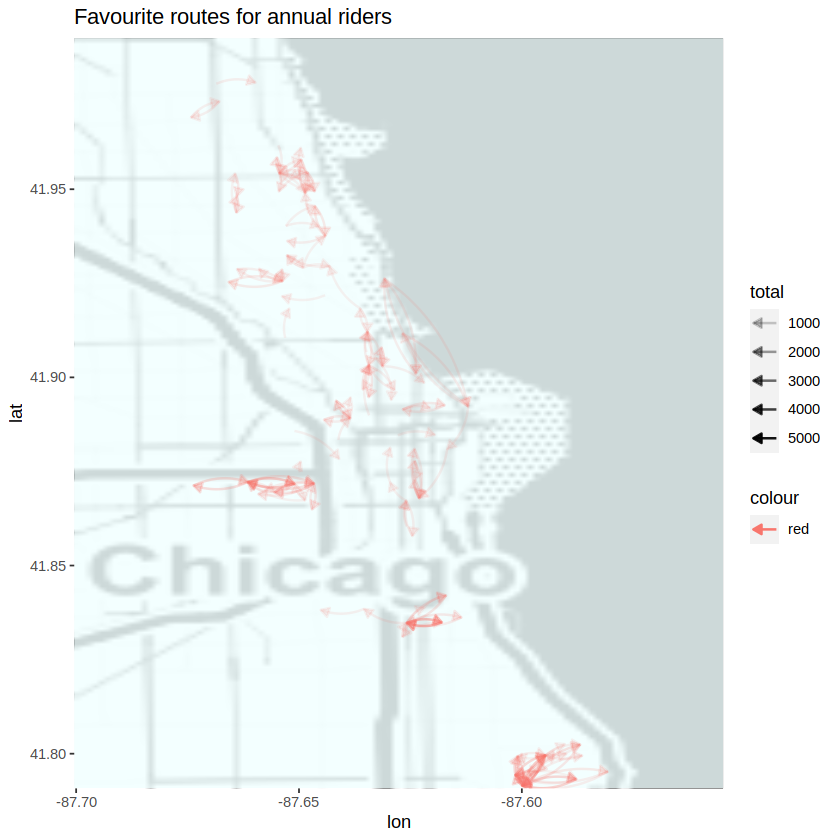

In [224]:
# plot_27: favourite routes for each customer type
chicago_bbc <- c(
  left = -87.700424,
  bottom = 41.790769,
  right = -87.554855,
  top = 41.990119
)

chicago_stamen <- get_stamenmap(
  bbox = chicago_bbc,
  zoom = 10,
  maptype = "toner"
)

ggmap(chicago_stamen ,darken = c(0.85, "Azure")) +
  geom_curve(casual_routes, mapping = aes(x = start_lng, y = start_lat, 
                                           xend = end_lng, yend = end_lat, 
                                           alpha= total, color="red"), 
                                      size = 0.7, curvature = .2,
                                      arrow = arrow(length=unit(0.2,"cm"),
                                      ends="first", type = "closed")) +
  coord_cartesian()+
  labs(title="Favourite routes for casual riders")


ggmap(chicago_stamen,darken = c(0.85, "Azure")) +
  geom_curve(member_routes, mapping = aes(x = start_lng,
                                          y = start_lat, 
                                          xend = end_lng, 
                                          yend = end_lat, 
                                          alpha= total, color="red"),
                                      size = 0.7, curvature = .2,
                                      arrow = arrow(length=unit(0.2,"cm"), 
                                      ends="first", type = "closed")) +  
  coord_cartesian()+
  labs(title="Favourite routes for annual riders")

#### quick notes:
- casual user tend to made more trips on the tourist area close to michigan lake 
- annual riders made more interior trips (working maybe)

## Conclusion 
- casual rider use more non-classic bikes compared to annual member
- Althought casual rider spent more time biking the average distance travelled are quite similar
- casual customers made more trip on weekend ,on the other side annual made more trips on workdays
- both customer type made more trip in warm months
- in term of distance travelled both made longer trip during weekend
- casual customers made more leisure biking than annual
## Recommendation:
1. Marketing strategy needs to focus on non-classic bike
2. Advertising better be made in the summer aound the toursist area and on a weekend day at around 5:00PM  
3. Marketing and advertizing strategy needs to focus on terms like leisure ,long trip and vacancy
4. Some trends and findings needs more data to be confirmed ie:
  - trip duration seems to be the same except for docked bikes when user tend to made longer trip on the 8th ,15th and 18th each month  
  - both customer have a huge peak in the ninth of every month 
5. If possible start collecting more data about customers like age and gender... , and implement more validation rules to assure data consistency and completness .
